# **Внимание читателям! Я не являюсь студентом ВШЭ, все решения опираются на соответствующий материал и мои немногочисленные знания, поэтому содержат ошибки, которые я не заметил. Весь обучающий материал взят из открытых источников с github.**


# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

In [1]:
#Сам ради интереса добавил (работает только для карт nvidia)
#!nvidia-smi  # this should display information about available GPUs

In [2]:
#Работает, но часто вызывает траблы
#get_ipython().kernel.do_shutdown(restart=True)
#%load_ext cudf.pandas

In [3]:
#Начало отсчёта времени выполнения всего кода
import time
import datetime

start_time = time.time()
print(f"🚀 Начало выполнения: {datetime.datetime.now().strftime('%H:%M:%S')}")

🚀 Начало выполнения: 13:06:32


В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [4]:
!pip install folium

In [5]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [7]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/scl/fi/9e1egviqrxfkxu7pc4wht/train.csv?rlkey=uc1hmnc5pwxce6cnuk9n4p5r3&st=frsvg69e&dl=0' #скачал на комп и закинул в на dropbox
train = pd.read_csv('train.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
train = train.drop(columns=['dropoff_datetime'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

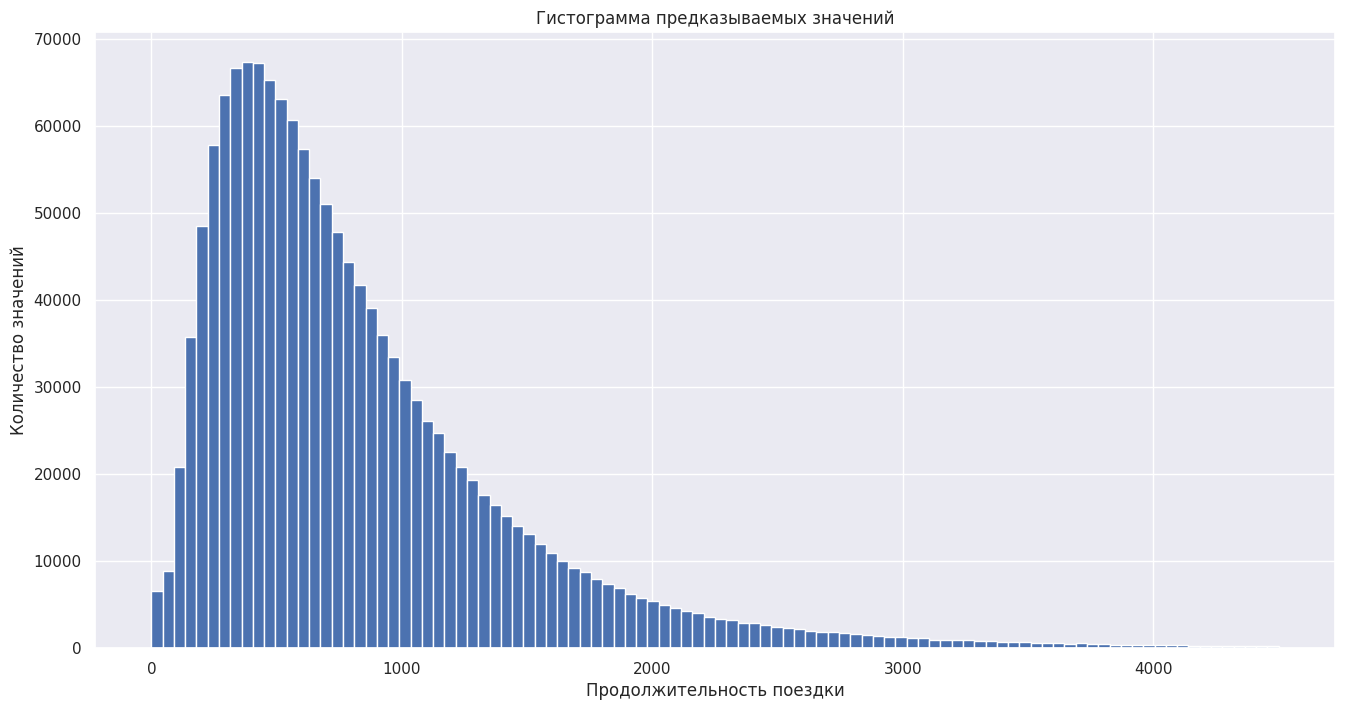

In [9]:
plt.figure(figsize=(16, 8))
plt.hist(train.loc[0:,['trip_duration']], bins=100, range=[0, 4500], log=False)
plt.title('Гистограмма предказываемых значений')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество значений')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Вначале переменная растёт экспоненциально. В окрестностях 400 находится экстремум, после которого функция убывает, принимая гиперболическую форму.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
Минимизация MSE для $\hat{y}$ эквивалентна минимизации RMSLE для исходных ${y}$ поскольку преобразование $a(x_i) = \exp(\hat{a}(x_i)) - 1$ является биекцией (взаимно однозначным соответствием между $\hat{a}(x_i)$ и ${a}(x_i)$, сохраняющей порядок ошибок), квадратичная ошибка MSE тождественна RMSLE, а нормировка и корень в RMSLE не влияют на положение минимума, будучи монотонными преобразованиями. $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$
$$\text{MSE}(X, y, a)= {\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i))^2}$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

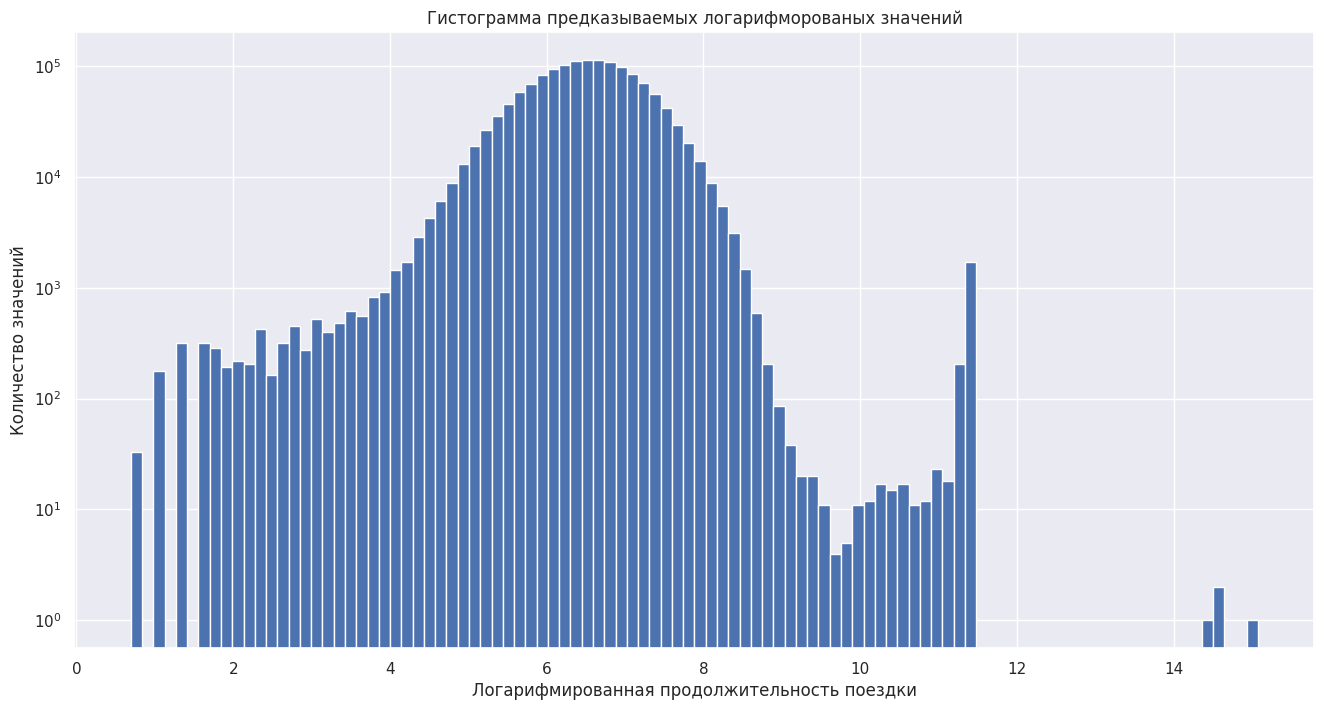

In [10]:
plt.figure(figsize=(16, 8))
train['log_trip_duration'] = np.log1p(train['trip_duration'])
plt.hist(train['log_trip_duration'], bins=100, log=True)
plt.title('Гистограмма предказываемых логарифморованых значений')
plt.xlabel('Логарифмированная продолжительность поездки')
plt.ylabel('Количество значений')
plt.show()

# train = train.drop(columns=['trip_duration'])

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [11]:
#для удобства
# train['log_trip_duration'].mean()
# train.groupby('log_trip_duration', as_index=False)[['id']].count().sort_values('id', ascending=False).iloc[0]['log_trip_duration']
# np.sqrt((train['log_trip_duration'].mean() - 5.671228409297406) ** 2)
train['log_trip_duration'].mean()# - 0.79575

np.float64(6.466978409297406)

In [12]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt((log1p_y_true - log1p_y_pred) ** 2)
    raise NotImplementedError

rmsle_best_const = rmsle(train['log_trip_duration'].mean(), 5.671228409297406)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.79575


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0, 0.5, 'Количество поездок')

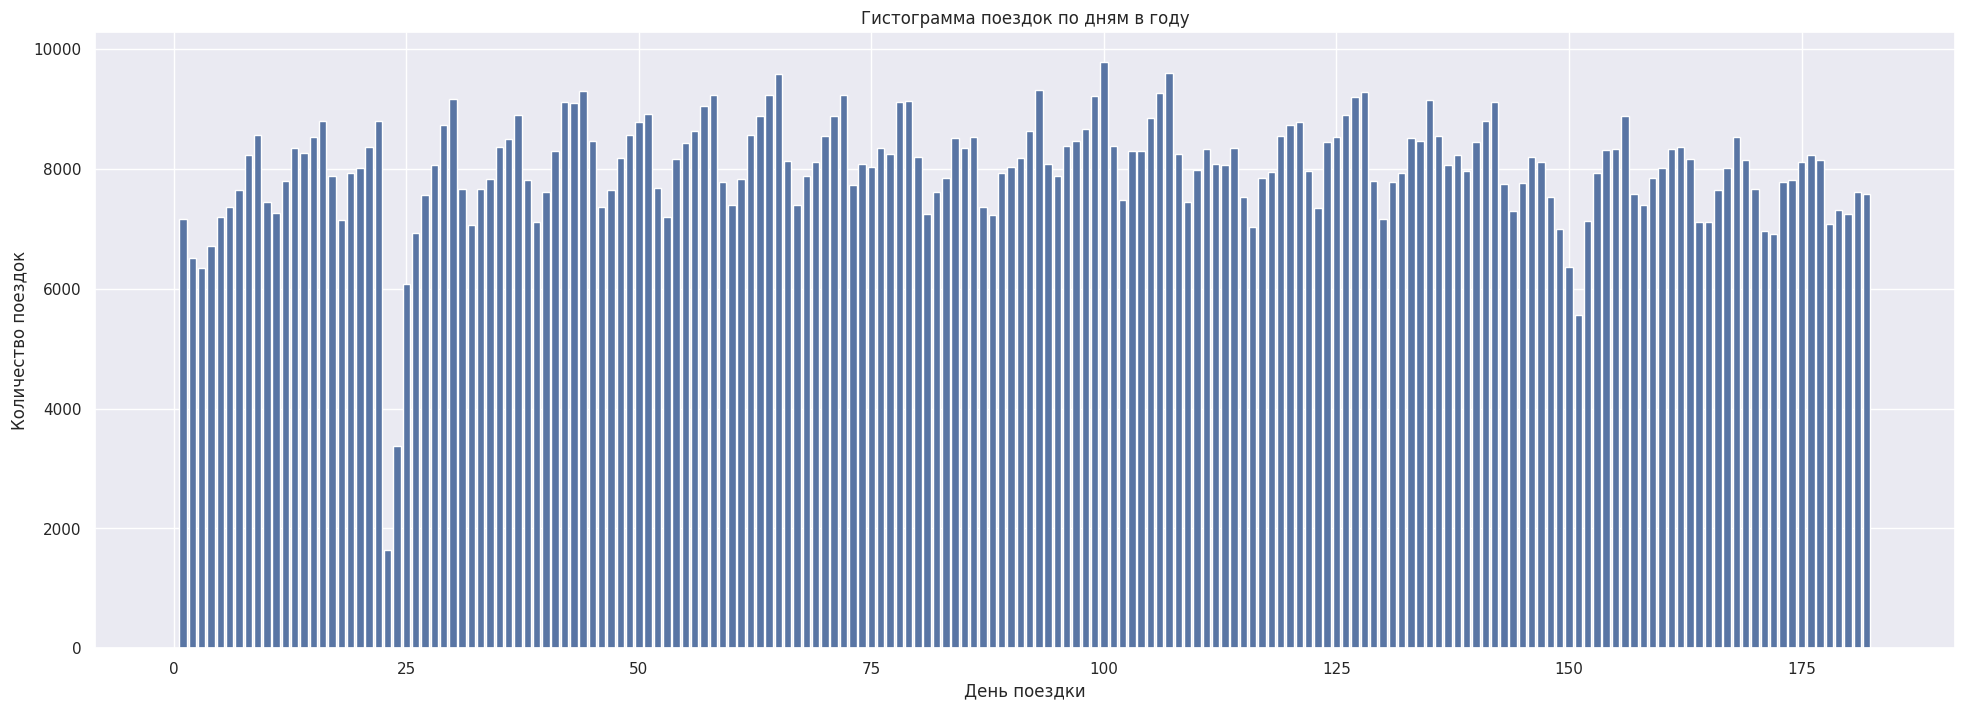

In [13]:
plt.figure(figsize=(24, 8))
ax = sns.countplot(train, x=train['pickup_datetime'].dt.day_of_year, native_scale=True, width=0.8)
ax.set_title('Гистограмма поездок по дням в году')
ax.set_xlabel('День поездки')
ax.set_ylabel('Количество поездок')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: В январе Нью-Йорк настигла сильная снежная буря. В мае проходил день поминовения, во время которого перекрывают дороги.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Text(0.5, 1.0, 'Распределение поездок по часам')

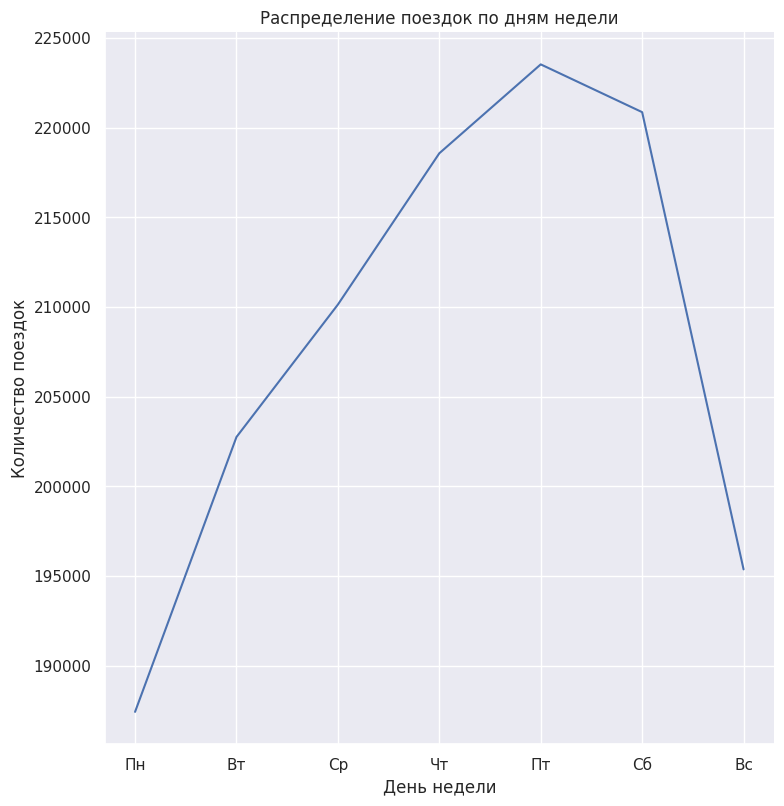

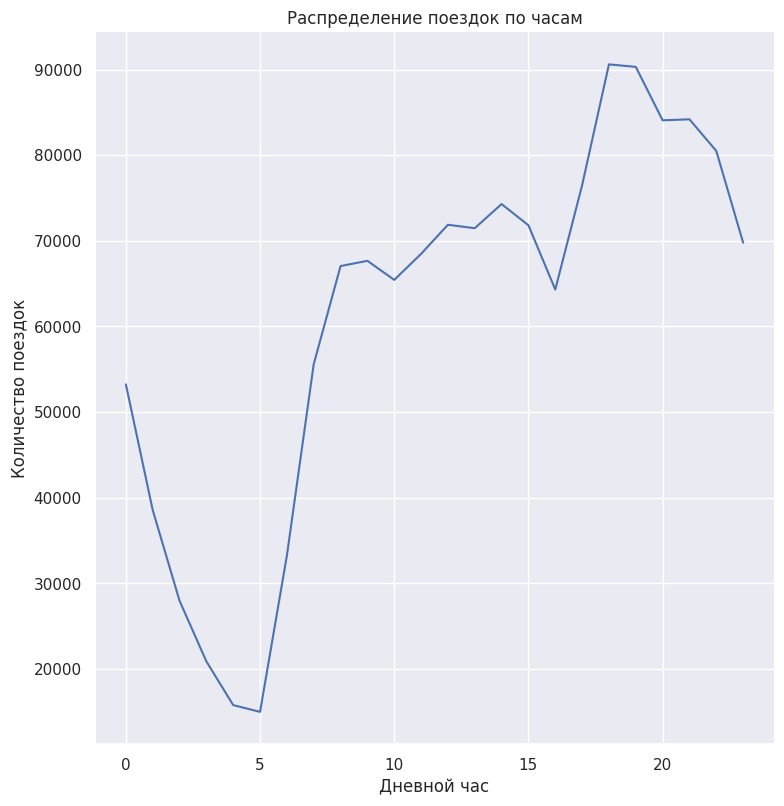

In [14]:
#train['pickup_datetime'].dt.date.value_counts().sort_values(ascending=True)
#2016-01-23 January 2016 United States blizzard
#2016-05-30 День поминовения в Нью-Йорке

plot_data1 = train['pickup_datetime'].dt.dayofweek.value_counts().reset_index().rename(columns={'pickup_datetime': 'day_of_week', 'count': 'trips'})
ax1 = sns.relplot(data=plot_data1, x='day_of_week', y='trips', height=8, aspect=1, kind='line')
ax1.set(
    xlabel="День недели",
    ylabel="Количество поездок",
    xticks=range(7),
    xticklabels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
)
plt.title("Распределение поездок по дням недели")

plot_data2 = train['pickup_datetime'].dt.hour.value_counts().reset_index().rename(columns={'pickup_datetime': 'hour', 'count': 'trips'})
ax2 = sns.relplot(data=plot_data2, x='hour', y='trips', height=8, aspect=1, kind='line')
ax2.set_axis_labels("Дневной час", "Количество поездок")
plt.title("Распределение поездок по часам")


# res = train.assign( hour=train['pickup_datetime'].dt.hour, day_of_week=train['pickup_datetime'].dt.dayofweek).groupby(['hour', 'day_of_week'], as_index=False)['id'].count()

# ax = sns.relplot(data=res, x=res['hour'], y=res['id'], hue=res['day_of_week'],
#     height=8,          # Высота в дюймах
#     aspect=1,          # Соотношение ширины к высоте (ширина = height * aspect)
#     palette=sns.color_palette("Spectral", as_cmap=True), # Цветовая схема
#     legend='brief',     # Показывать все элементы легенды
#     kind='line'
# )

# # Переименовываем легенду
# legend_labels = {
#     0: 'Понедельник',
#     1: 'Вторник',
#     2: 'Среда',
#     3: 'Четверг',
#     4: 'Пятница',
#     5: 'Суббота',
#     6: 'Воскресенье'
# }

# # Создаем новую легенду
# handles, _ = ax.axes[0,0].get_legend_handles_labels()
# ax.axes[0,0].legend(
#     handles=handles,
#     labels=[legend_labels[int(float(text))] for text in _],
#     title='День недели',
#     bbox_to_anchor=(1.05, 1),  # Позиция справа от графика
#     loc='upper left',
#     borderaxespad=0.
# )

# ax.set_axis_labels("Дневной час", "Количество поездок")
# ax.fig.suptitle('Распределение поездок по часам и дням недели', y=1.05)
# plt.xticks(range(0, 24))
# plt.tight_layout()  # Автоматическая подгонка отступов

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

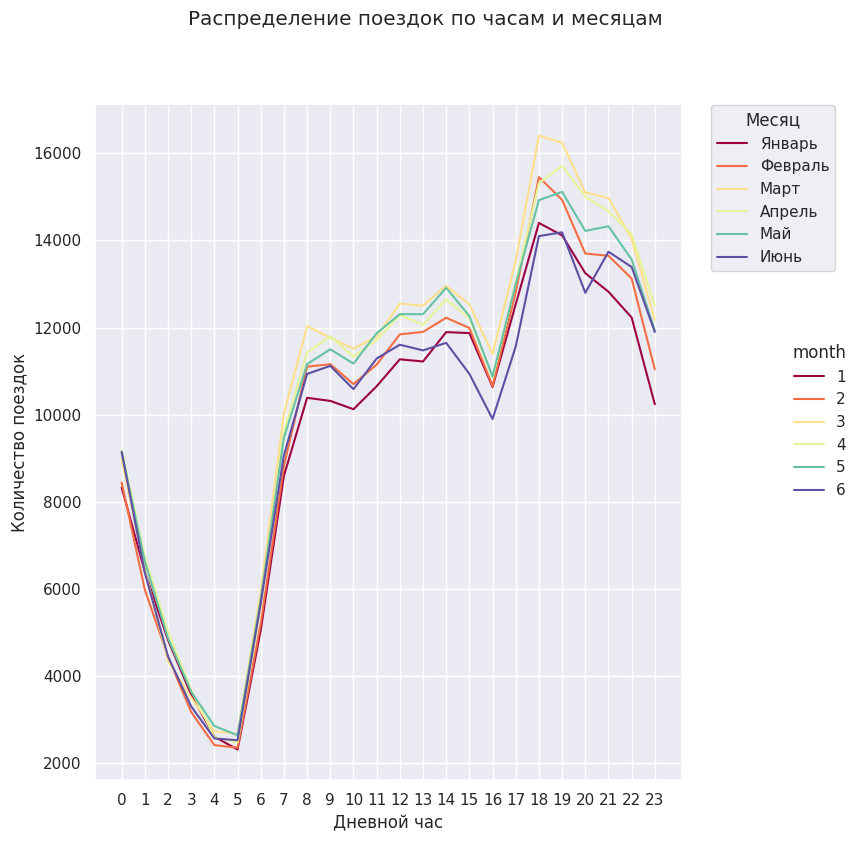

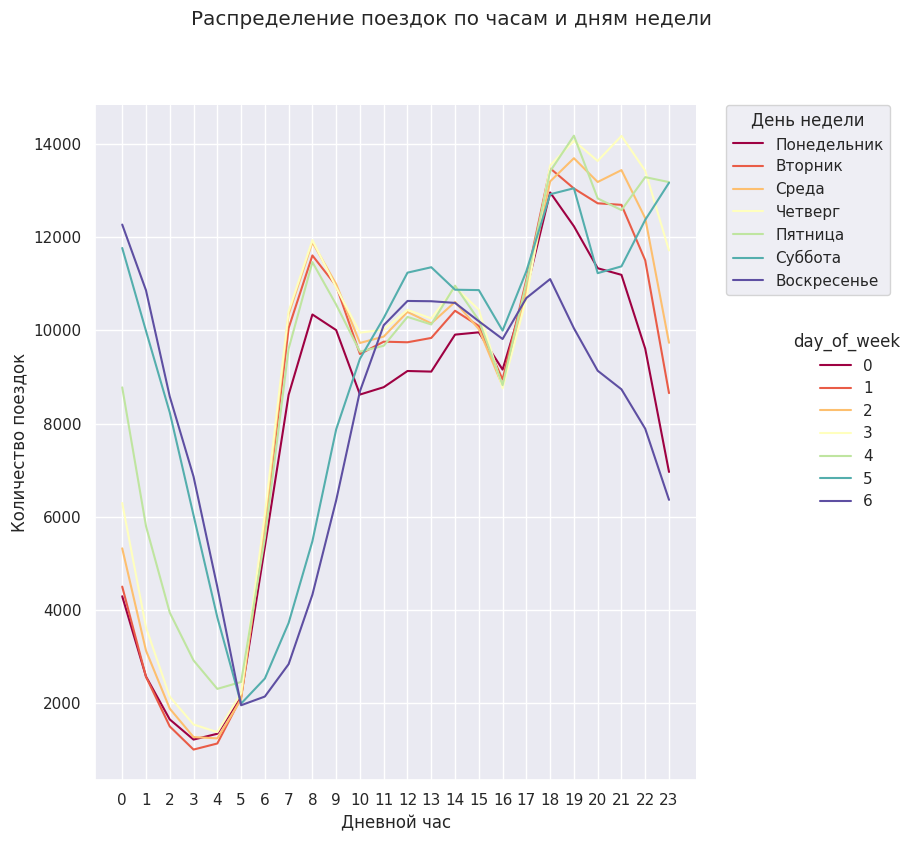

In [15]:
res = train.assign( hour=train['pickup_datetime'].dt.hour, month=train['pickup_datetime'].dt.month).groupby(['hour', 'month'], as_index=False)['id'].count()

ax = sns.relplot(data=res, x=res['hour'], y=res['id'], hue=res['month'],
    height=8,          # Высота в дюймах
    aspect=1,          # Соотношение ширины к высоте (ширина = height * aspect)
    palette=sns.color_palette("Spectral", as_cmap=True), # Цветовая схема
    legend='brief',     # Показывать все элементы легенды
    kind='line'
)

# Переименовываем легенду
legend_labels_months = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

# Создаем новую легенду
handles, _ = ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(
    handles=handles,
    labels=[legend_labels_months[int(float(text))] for text in _],
    title='Месяц',
    bbox_to_anchor=(1.05, 1),  # Позиция справа от графика
    loc='upper left',
    borderaxespad=0.
)

ax.set_axis_labels("Дневной час", "Количество поездок")
ax.fig.suptitle('Распределение поездок по часам и месяцам', y=1.05)
plt.xticks(range(0, 24))
plt.tight_layout()  # Автоматическая подгонка отступов

res = train.assign( hour=train['pickup_datetime'].dt.hour, day_of_week=train['pickup_datetime'].dt.dayofweek).groupby(['hour', 'day_of_week'], as_index=False)['id'].count()

ax = sns.relplot(data=res, x=res['hour'], y=res['id'], hue=res['day_of_week'],
    height=8,          # Высота в дюймах
    aspect=1,          # Соотношение ширины к высоте (ширина = height * aspect)
    palette=sns.color_palette("Spectral", as_cmap=True), # Цветовая схема
    legend='brief',     # Показывать все элементы легенды
    kind='line'
)

# Переименовываем легенду
legend_labels = {
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

# Создаем новую легенду
handles, _ = ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(
    handles=handles,
    labels=[legend_labels[int(float(text))] for text in _],
    title='День недели',
    bbox_to_anchor=(1.05, 1),  # Позиция справа от графика
    loc='upper left',
    borderaxespad=0.
)

ax.set_axis_labels("Дневной час", "Количество поездок")
ax.fig.suptitle('Распределение поездок по часам и дням недели', y=1.05)
plt.xticks(range(0, 24))
plt.tight_layout()  # Автоматическая подгонка отступов

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: В среднем больше всего такси вызывают в окрестностях рабочих часов, особенно вечером. В выходные днём и ночью много людей вызывают такси, скорее всего, отдыхают, посещая мероприятия. В марте заметно больше вызовов такси из-за множества фестивалей, концертов и иных культурно-развлекательных событий.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

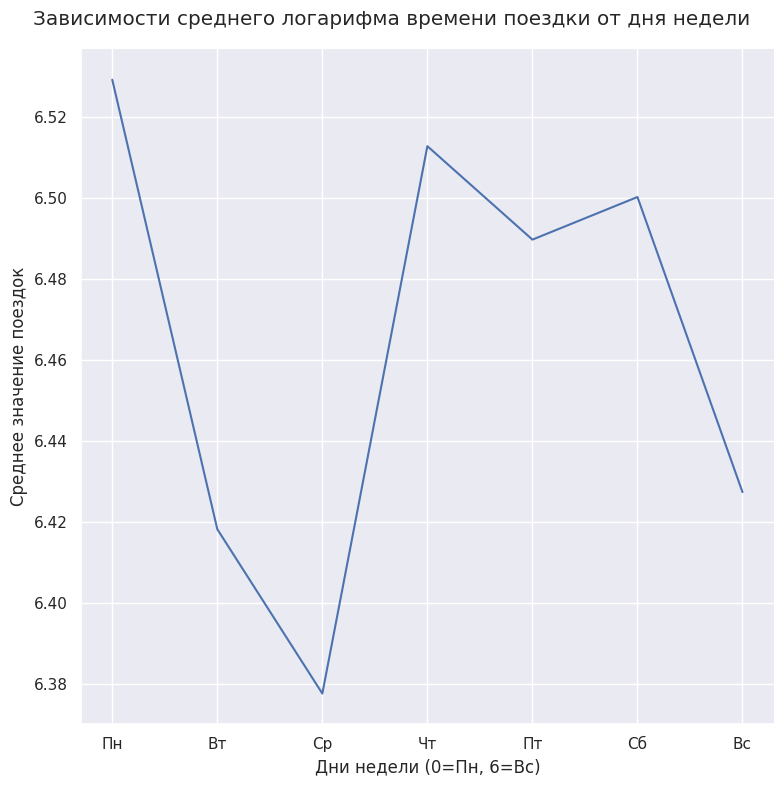

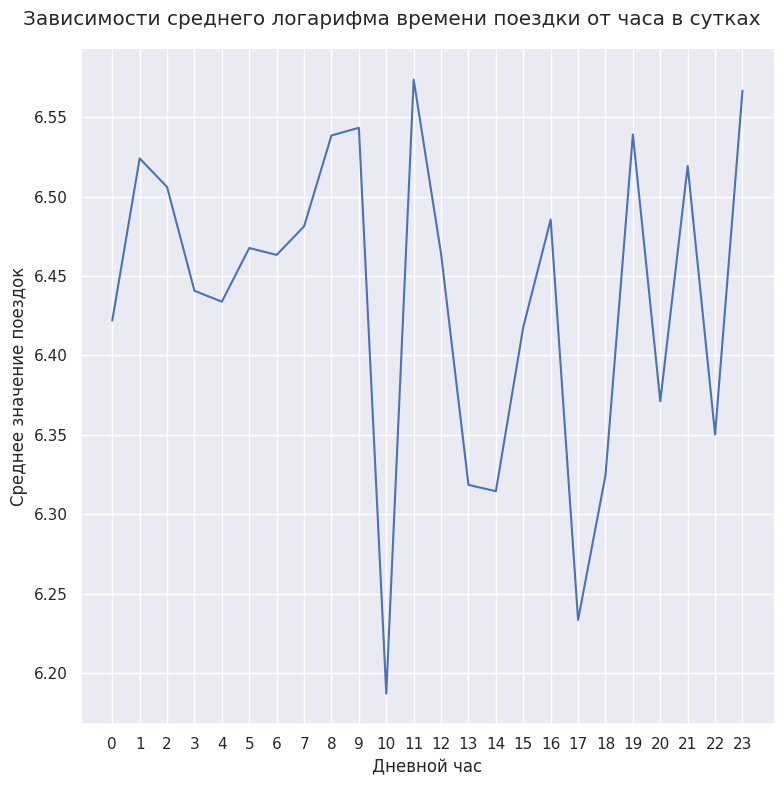

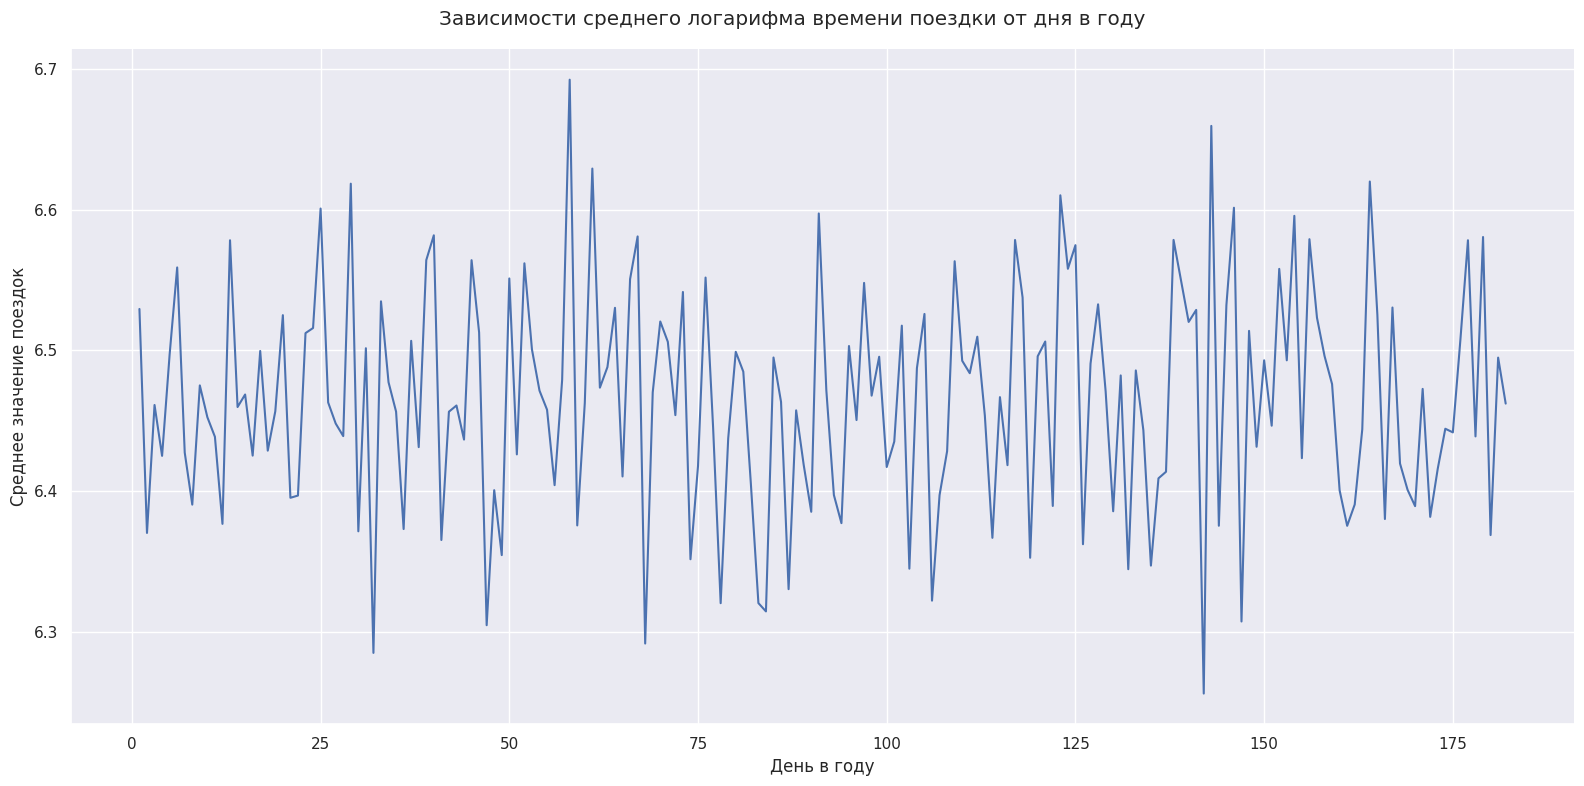

In [16]:
from sklearn.model_selection import train_test_split

y = train['log_trip_duration'].copy()
x = train.drop(columns=['log_trip_duration']).copy()

# Обучающую и тестовую выборки делим в отношении 7:3# Обучающую и тестовую выборки делим в отношении 7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=10)  # Обучающую и тестовую выборки делим в отношении 7:3
# Обучающую и тестовую выборки делим в отношении 7:3# Обучающую и тестовую выборки делим в отношении 7:3

train_data = x_train.copy()
train_data['log_trip_duration'] = y_train

test_data = x_test.copy()
test_data['log_trip_duration'] = y_test

ax1 = sns.relplot(x=train_data['pickup_datetime'].dt.dayofweek.unique(), y=train_data.groupby(train_data['pickup_datetime'].dt.dayofweek)['log_trip_duration'].mean(),
    height=8,          # Высота в дюймах
    aspect=1,          # Соотношение ширины к высоте (ширина = height * aspect)
    legend='full',     # Показывать все элементы легенды
    kind='line')
ax1.set_axis_labels('Дни недели (0=Пн, 6=Вс)', 'Среднее значение поездок')
ax1.fig.suptitle('Зависимости среднего логарифма времени поездки от дня недели')
ax1.set(xticks=range(7), xticklabels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.tight_layout()  # Автоматическая подгонка отступов

ax2 = sns.relplot(x=train_data['pickup_datetime'].dt.hour.unique(), y=train_data.groupby(train_data['pickup_datetime'].dt.hour)['log_trip_duration'].mean(),
    height=8,
    aspect=1,
    legend='full',
    kind='line')
ax2.set_axis_labels('Дневной час', 'Среднее значение поездок')
ax2.fig.suptitle('Зависимости среднего логарифма времени поездки от часа в сутках')
plt.xticks(range(0, 24))
plt.tight_layout()

ax3 = sns.relplot(x=train_data['pickup_datetime'].dt.dayofyear.unique(), y=train_data.groupby(train_data['pickup_datetime'].dt.dayofyear)['log_trip_duration'].mean(),
    height=8,
    aspect=2,
    legend='full',
    kind='line')
ax3.set_axis_labels('День в году', 'Среднее значение поездок')
ax3.fig.suptitle('Зависимости среднего логарифма времени поездки от дня в году')
# plt.xticks(range(1, 190))
plt.tight_layout()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Графики различаются, поскольку на количественное значение влияет спрос, а на среднее значение длительности - дорожные условия.
В аномальный период окрестности 2016-01-23 средний таргет растёт, несмотря на малое значение поездок, вероятно, из-за того, что поездки длились гораздо дольше на заснеженной дороге. В аномальный период окрестности 2016-05-30 таргет резко падает, после чего стабилизируется, вероятно, из-за того, что длительность поездок сократилась с перекрытыми улицами.
В зимний сезон (январь-февраль) тренд восходящий, в марте тренд нисходящий, после чего снова воходящий несколько месяцев, затем нисходящий.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [17]:
# # x_train.groupby(x_train['pickup_datetime'].dt.dayofyear, as_index=False).count().sort_values('id')

train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['is_anomaly_1'] = train_data['pickup_datetime'].dt.dayofyear == 22
train_data['is_anomaly_2'] = train_data['pickup_datetime'].dt.dayofyear == 150
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear

test_data['day_of_week'] = test_data['pickup_datetime'].dt.dayofweek
test_data['month'] = test_data['pickup_datetime'].dt.month
test_data['hour'] = test_data['pickup_datetime'].dt.hour
test_data['is_anomaly_1'] = test_data['pickup_datetime'].dt.dayofyear == 22
test_data['is_anomaly_2'] = test_data['pickup_datetime'].dt.dayofyear == 150
test_data['day_of_year'] = test_data['pickup_datetime'].dt.dayofyear

x_train['day_of_week'] = x_train['pickup_datetime'].dt.dayofweek
x_train['month'] = x_train['pickup_datetime'].dt.month
x_train['hour'] = x_train['pickup_datetime'].dt.hour
x_train['is_anomaly_1'] = x_train['pickup_datetime'].dt.dayofyear == 22
x_train['is_anomaly_2'] = x_train['pickup_datetime'].dt.dayofyear == 150
x_train['day_of_year'] = x_train['pickup_datetime'].dt.dayofyear

x_test['day_of_week'] = x_test['pickup_datetime'].dt.dayofweek
x_test['month'] = x_test['pickup_datetime'].dt.month
x_test['hour'] = x_test['pickup_datetime'].dt.hour
x_test['is_anomaly_1'] = x_test['pickup_datetime'].dt.dayofyear == 22
x_test['is_anomaly_2'] = x_test['pickup_datetime'].dt.dayofyear == 150
x_test['day_of_year'] = x_test['pickup_datetime'].dt.dayofyear



# train['day_of_week'] = train['pickup_datetime'].dt.dayofweek
# train['month'] = train['pickup_datetime'].dt.month
# train['hour'] = train['pickup_datetime'].dt.hour
# train['is_anomaly_1'] = train['pickup_datetime'].dt.dayofyear == 22
# train['is_anomaly_2'] = train['pickup_datetime'].dt.dayofyear == 150
# train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

train.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
trip_duration,int64


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Все признаки кроме координат и day_of_year стоит рассматривать как категориальные, поскольку они нецикличны в пространстве признаков.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_year']

categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_1', 'is_anomaly_2']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train[numeric_features])
# x_test_scaled = scaler.transform(x_test[numeric_features])

# model = Ridge()
model = pipeline.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 0.5935
Train MSE = 0.5974


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [19]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [20]:
show_circles_on_map(train.sample(10000), "pickup_latitude", "pickup_longitude", "blue")

Output hidden; open in https://colab.research.google.com to view.

In [21]:
show_circles_on_map(train.sample(10000), "dropoff_latitude", "dropoff_longitude", "blue")

Output hidden; open in https://colab.research.google.com to view.

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: От основной массы можно выделить аэропорты (3 шт), поскольку они находятся вдалеке и имеют небольшой разброс в координатах.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [22]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# def haversine_array(lat1, lng1, lat2, lng2):
#     lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
#     AVG_EARTH_RADIUS = 6371  # in km
#     lat = lat2 - lat1
#     lng = lng2 - lng1
#     d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
#     h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
#     return h



# distances = []
for d in [train_data, test_data]:
  dataf = d #train_data
  for idx in dataf.index: # Около 8 минут
    row = dataf.loc[idx]

    start_lat = np.radians(row['pickup_latitude'])
    start_lon = np.radians(row['pickup_longitude'])
    end_lat = np.radians(row['dropoff_latitude'])
    end_lon = np.radians(row['dropoff_longitude'])

    start = np.array([[start_lat, start_lon]])
    end = np.array([[end_lat, end_lon]])

    dist = haversine_distances(start, end)
    dataf.at[idx, 'haversine'] = dist[0][0] * 6371



# slice_size = 10000
# train['haversine'] = 0.0
# # Вычисление по слайсам
# for i in range(0, len(train), slice_size):
#     # Определяем границы текущего слайса
#     start_idx = i
#     end_idx = min(i + slice_size, len(train))

#     # Извлекаем координаты для текущего слайса
#     pickup_coords = np.radians(train.iloc[start_idx:end_idx][['pickup_latitude', 'pickup_longitude']].values)
#     dropoff_coords = np.radians(train.iloc[start_idx:end_idx][['dropoff_latitude', 'dropoff_longitude']].values)

#     # Вычисляем расстояния (в метрах)
#     distances = haversine_distances(pickup_coords, dropoff_coords) * 6371000/1000  # 6371000 - радиус Земли в метрах

#     # Записываем диагональные элементы (расстояния между соотв. точками)
#     train.iloc[start_idx:end_idx, train.columns.get_loc('haversine')] = np.diag(distances)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [23]:
# train_data['log_haversine'] = np.log1p(train_data['haversine'])
# train_data

for d in [train_data, test_data]:
  d['log_haversine'] = np.log1p(d['haversine'])
train_data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_week,month,hour,is_anomaly_1,is_anomaly_2,day_of_year,haversine,log_haversine
824746,id2365163,2,2016-03-27 00:25:29,3,-73.996986,40.742210,-73.987740,40.710659,N,1254,7.134891,6,3,0,False,False,87,3.593840,1.524716
645821,id3126187,2,2016-03-18 20:44:12,1,-73.989929,40.741760,-73.977280,40.783600,N,970,6.878326,4,3,20,False,False,78,4.772773,1.753153
691846,id2588127,2,2016-04-15 18:26:12,2,-73.972366,40.750725,-73.861832,40.768387,N,2084,7.642524,4,4,18,False,False,106,9.514706,2.352775
1147931,id0915715,2,2016-03-24 14:28:34,1,-73.982361,40.776901,-73.975128,40.760921,N,980,6.888572,3,3,14,False,False,84,1.878364,1.057222
183569,id3758776,1,2016-04-28 13:53:52,1,-73.973778,40.764374,-73.966957,40.761024,N,481,6.177944,3,4,13,False,False,119,0.684609,0.521533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348317,id2763967,1,2016-05-12 05:16:06,1,-73.996178,40.748222,-73.990967,40.755478,N,180,5.198497,3,5,5,False,False,133,0.918456,0.651521
1154171,id0853058,1,2016-01-16 19:14:54,1,-73.995415,40.728886,-73.993706,40.744068,N,6552,8.787678,5,1,19,False,False,16,1.694346,0.991155
617841,id2242904,1,2016-03-21 20:11:12,1,-73.960091,40.779701,-73.960136,40.773102,N,151,5.023881,0,3,20,False,False,81,0.733833,0.550334
1048548,id2558617,1,2016-04-09 09:21:44,1,-73.968124,40.799923,-73.952415,40.818588,N,436,6.079933,5,4,9,False,False,100,2.460812,1.241503


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [24]:
your_df = train_data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

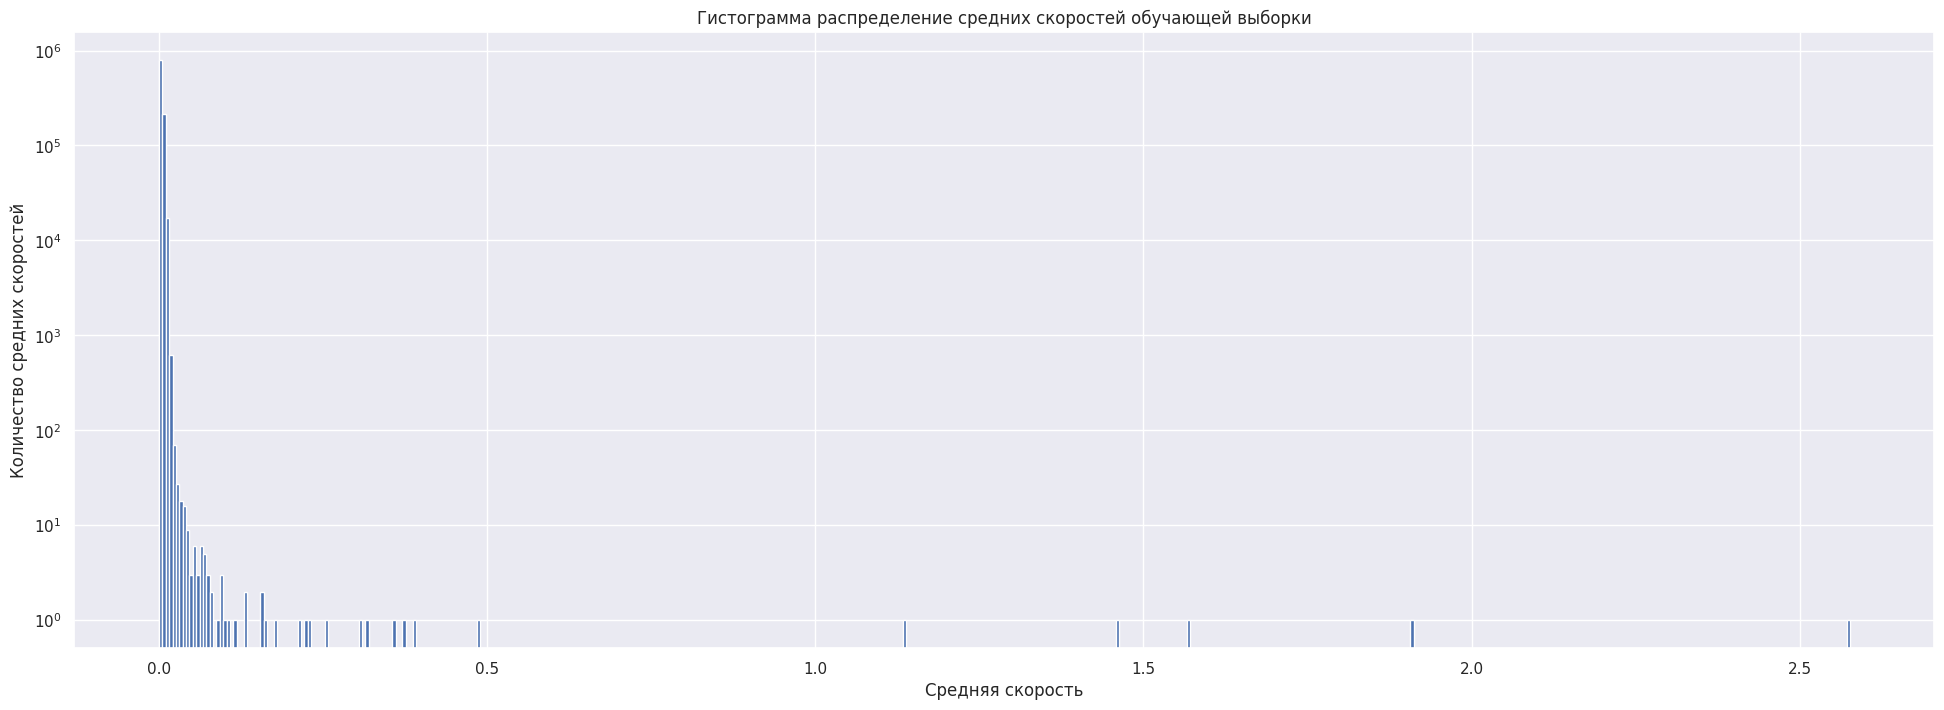

In [25]:
plt.figure(figsize=(24, 8))
mean_speed = ((train_data['haversine'] / train_data['trip_duration']))
# mean_speed
plt.hist(mean_speed, bins=500, log=True)
plt.title('Гистограмма распределение средних скоростей обучающей выборки')
plt.xlabel('Средняя скорость')
plt.ylabel('Количество средних скоростей')
plt.show()


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

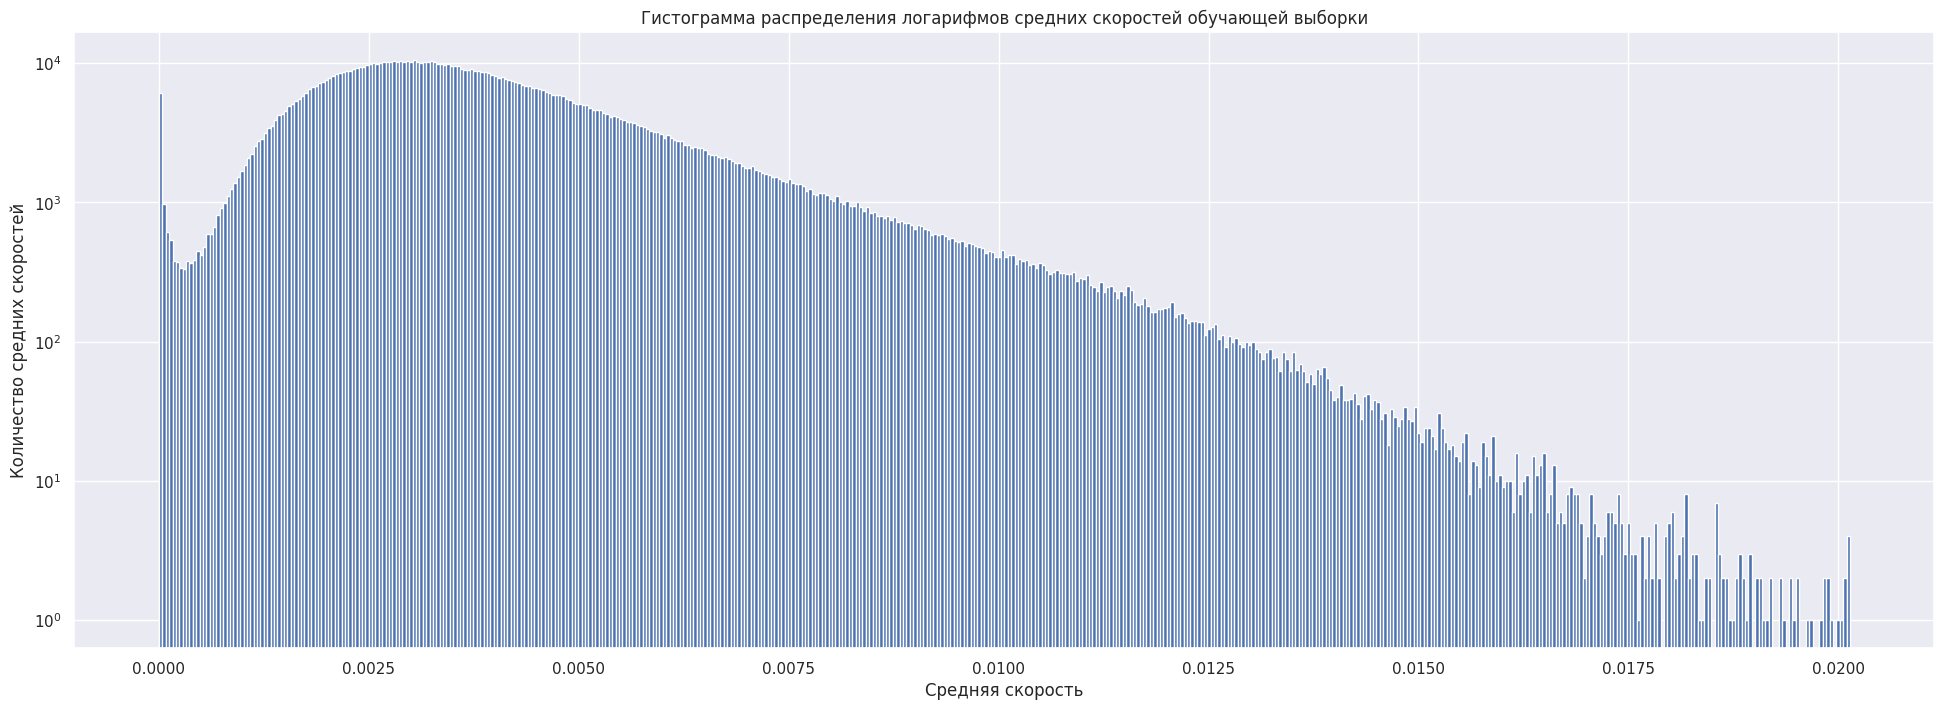

In [26]:
plt.figure(figsize=(24, 8))
plt.hist(mean_speed[ mean_speed < mean_speed.quantile(0.9998)], bins=500, log=True)
plt.title('Гистограмма распределения логарифмов средних скоростей обучающей выборки')
plt.xlabel('Средняя скорость')
plt.ylabel('Количество средних скоростей')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

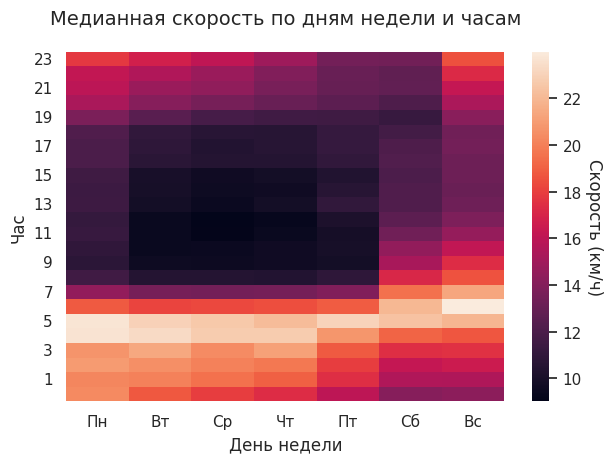

In [27]:
train_data['speed'] = train_data['haversine'] / (train_data['trip_duration'] / 3600)
median_df = train_data.groupby(['day_of_week', 'hour'], as_index=False)[['speed']].median()

ax = sns.heatmap(median_df.pivot(index="hour", columns="day_of_week", values="speed").sort_index(ascending=False), annot=False, cbar=True)

ax.set_title('Медианная скорость по дням недели и часам', fontsize=14, pad=20)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Час', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # 0 градусов (горизонтально)

day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
ax.set_xticklabels(day_names)

cbar = ax.collections[0].colorbar
cbar.set_label('Скорость (км/ч)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Время можно высчитать по конуреной формуле через скорость, это помешает модели обнаружить неочевидные зависимости и сделает задачу бессмысленной.

In [28]:
train_data = train_data.drop(columns=['speed'])

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость минимальна к окончанию утра и в первой половине дня, когда на дорогах появляются пробки. Максимальные значения скорости проявляются ранним утром, когда дороги свободны. Такие зависимости характерны для мегаполисов.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [29]:
for d in [train_data, test_data]:
  d['trip_during_traffic_jams'] = np.where((d['day_of_week'] < 5) & ( (d['hour'] > 7) & (d['hour'] < 20) ), True, False) # Пробки в будние дни с 8 до 19
  d['trip_during_free_roads'] = ~d['trip_during_traffic_jams']
  d

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Такие признаки могут улучшить модель, поскольку косвенно связывают длительность поездки и координаты, выявляя специфичные зоны.

In [30]:
airports = {
    'LaGuardia': (40.77521846062417, -73.86508945455554),
    'JohnFKennedyInternational': (40.64652498962413, -73.78825688901928),
    'NewarkLibertyInternational': (40.69145197878408, -74.17949668272686)
}

# Создаем признаки для каждого аэропорта
for d in [train_data, test_data]:
  for airport, (lat, lon) in airports.items():
      d[f'pickup_at_airport_{airport}'] = np.where((abs(d['pickup_latitude'] - lat) < 0.007) & (abs(d['pickup_longitude'] - lon) < 0.007), True, False)
      d[f'dropoff_at_airport_{airport}'] = np.where((abs(d['dropoff_latitude'] - lat) < 0.007) & (abs(d['dropoff_longitude'] - lon) < 0.007), True, False)

# show_circles_on_map(train_data[(train_data[f'dropoff_at_airport_LaGuardia'] == True)], "dropoff_latitude", "dropoff_longitude", "blue")
# train_data

In [31]:

#show_circles_on_map(train_data[(train_data['pickup_at_airport_NewarkLibertyInternational'] == True)], "pickup_latitude", "pickup_longitude", "blue") Проверка точности координат

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

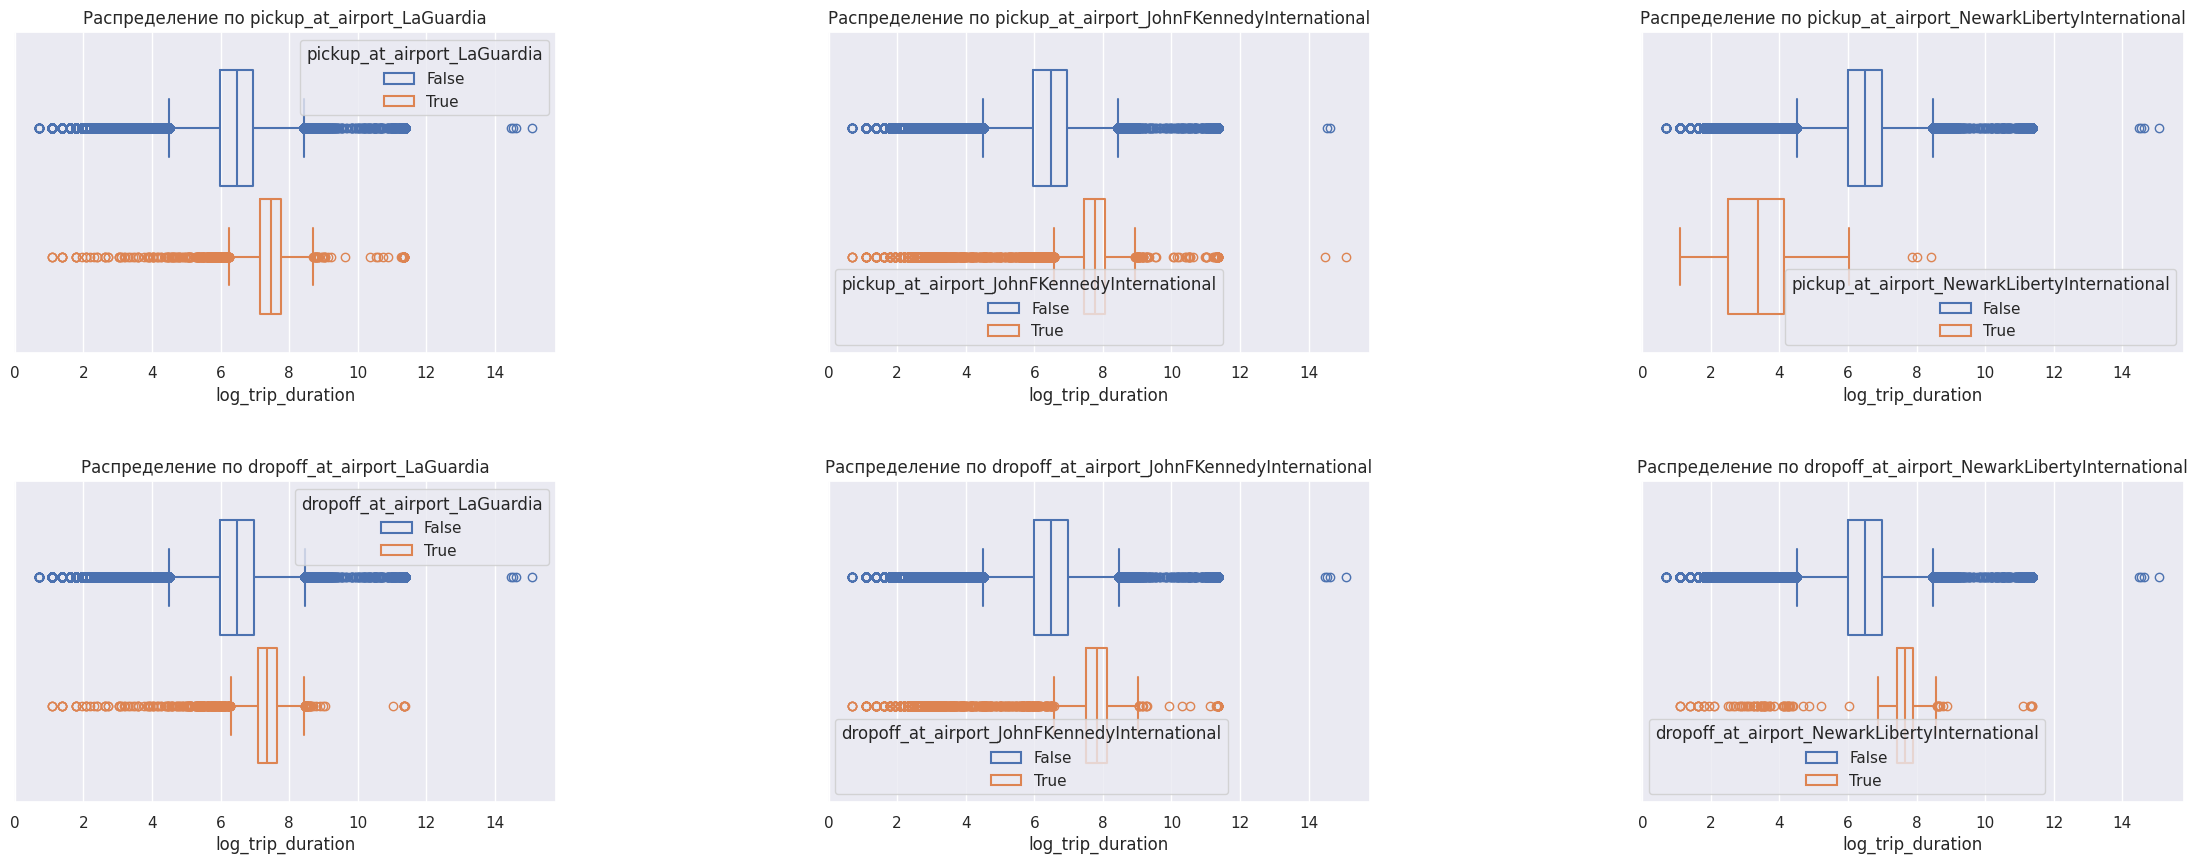

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i, column in enumerate(train_data.columns[21:27]):
  row = i % 2
  col = i // 2
  # print(row, col)
  sns.boxplot(x=train_data['log_trip_duration'], hue=train_data[column], fill=False, gap=.1, ax=axes[row, col], log_scale=False)
  axes[row, col].set_title(f'Распределение по {column}')
  axes[row, col].set_xlabel('log_trip_duration')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: признаки получились неплохими, поскольку в среднем у поездок от/до аэропортов время в пути в среднем больше.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin


class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tdata=None):
        self.transformed_train_data = None
        self.start_coordinates = [40.700100059685594, -74.01904609380574]
        self.end_coordinates = [40.700100059685594 + 0.1, -74.01904609380574 + 0.09]
        self.column_num = 8
        self.row_num = 8
        self.step_latitude = 0.1 / self.row_num
        self.step_longitude = 0.09 / self.column_num
        pass

    def show_map(self):
        # Рисуем клетки
        # start_coordinates = [40.700100059685594, -74.01904609380574]
        m = folium.Map(location=self.start_coordinates) # [lat, long]
        kw = {
        "color": "red",
        "line_cap": "round",
        "fill": False,
        "weight": 5,
        "popup": "Welcome to New-York",}
        folium.Rectangle(bounds=[self.start_coordinates, self.end_coordinates], line_join="bevel", dash_array="15, 10, 5, 10, 15", **kw).add_to(m)

        for i in range(self.row_num):
          for j in range(self.column_num):
            kw_ = {
            "color": "blue",
            "line_cap": "round",
            "fill": True,
            "weight": 5,
            "tooltip": f'{i * 8 + j + 1}',}
            folium.Rectangle(bounds=[[self.start_coordinates[0] + self.step_latitude * i, self.start_coordinates[1] + self.step_longitude * j],
                                     [self.start_coordinates[0] + self.step_latitude * (i+1), self.start_coordinates[1] + self.step_longitude * (j+1)]],
                                    line_join="bevel",
                                    dash_array="15, 10, 5, 10, 15", **kw_).add_to(m)

        return m
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def get_cell(self, lat, lon): # Моя функция
        in_bounds = ( (lat >= self.start_coordinates[0]) & (lat <= self.end_coordinates[0]) & (lon >= self.start_coordinates[1]) & (lon <= self.end_coordinates[1]) )

        cells = np.clip((lat - self.start_coordinates[0]) // self.step_latitude, 0, self.row_num - 1) * self.row_num + np.clip((lon - self.start_coordinates[1]) // self.step_longitude, 0, self.column_num - 1) + 1

        cells[~in_bounds] = -1
        return cells

    def transform(self, X, y=None):
       X = X.copy()
       X['pickup_cell'] = self.get_cell(X[['pickup_latitude']].values, X[['pickup_longitude']].values)
       X['dropoff_cell'] = self.get_cell(X[['dropoff_latitude']].values, X[['dropoff_longitude']].values)

       return X

# for d in [train_data, test_data]:

transformer = MapGridTransformer()
transformed_trained_data = transformer.transform(train_data)
transformed_tested_data = transformer.transform(test_data)
transformer.show_map()

In [34]:
show_circles_on_map(transformed_trained_data[transformed_trained_data['pickup_cell'] > -1].sample(10000), "pickup_latitude", "pickup_longitude", "blue")

Output hidden; open in https://colab.research.google.com to view.

In [35]:
y_trained_data = transformed_trained_data['log_trip_duration'].copy()
x_trained_data = transformed_trained_data.drop(columns=['log_trip_duration']).copy()
transformed_trained_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_week', 'month', 'hour', 'is_anomaly_1',
       'is_anomaly_2', 'day_of_year', 'haversine', 'log_haversine',
       'trip_during_traffic_jams', 'trip_during_free_roads',
       'pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia',
       'pickup_at_airport_JohnFKennedyInternational',
       'dropoff_at_airport_JohnFKennedyInternational',
       'pickup_at_airport_NewarkLibertyInternational',
       'dropoff_at_airport_NewarkLibertyInternational', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

In [36]:
y_tested_data = transformed_tested_data['log_trip_duration'].copy()
x_tested_data = transformed_tested_data.drop(columns=['log_trip_duration']).copy()
transformed_tested_data

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,trip_during_traffic_jams,trip_during_free_roads,pickup_at_airport_LaGuardia,dropoff_at_airport_LaGuardia,pickup_at_airport_JohnFKennedyInternational,dropoff_at_airport_JohnFKennedyInternational,pickup_at_airport_NewarkLibertyInternational,dropoff_at_airport_NewarkLibertyInternational,pickup_cell,dropoff_cell
112342,id2631171,2,2016-01-23 00:09:14,1,-74.006615,40.731712,-73.991890,40.727161,N,660,...,False,True,False,False,False,False,False,False,18.0,19.0
840803,id2892416,1,2016-02-10 19:24:14,3,-73.963203,40.777924,-74.004059,40.747654,N,1833,...,True,False,False,False,False,False,False,False,53.0,26.0
184538,id3095142,2,2016-05-12 06:39:26,1,-73.987595,40.719822,-74.010994,40.716148,N,490,...,False,True,False,False,False,False,False,False,11.0,9.0
512001,id3803823,2,2016-01-21 08:31:03,1,-73.969055,40.763618,-73.974129,40.778679,N,767,...,True,False,False,False,False,False,False,False,45.0,52.0
776055,id3155730,2,2016-01-02 13:12:33,2,-73.950165,40.775635,-73.944534,40.779636,N,199,...,False,True,False,False,False,False,False,False,55.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846197,id1951185,1,2016-01-09 23:00:55,4,-74.005753,40.739868,-73.997940,40.725216,N,1276,...,False,True,False,False,False,False,False,False,26.0,18.0
85559,id1088375,2,2016-06-02 15:06:24,1,-73.970680,40.783981,-73.952904,40.780006,N,1032,...,True,False,False,False,False,False,False,False,53.0,54.0
940126,id1422099,1,2016-05-02 09:51:23,1,-73.998932,40.734386,-73.991318,40.745682,N,1100,...,True,False,False,False,False,False,False,False,18.0,27.0
643278,id2188597,2,2016-04-06 09:28:59,1,-73.957962,40.776279,-73.991577,40.750111,N,2037,...,True,False,False,False,False,False,False,False,54.0,35.0


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

numeric_features = ['haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads']
categorical_features = ['pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia', 'pickup_at_airport_JohnFKennedyInternational',  'dropoff_at_airport_JohnFKennedyInternational',
                        'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational', 'pickup_cell', 'dropoff_cell']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_trained_data, y_trained_data)
y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

Test MSE = 0.2278
Train MSE = 0.2307


In [38]:
print("Size before OneHot:", x_trained_data.shape)
print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)

Size before OneHot: (1021050, 28)
Size after OneHot: (1021050, 145)


In [39]:
# model = Ridge()
# model.fit(X_train[numeric_features], y_train)
# y_pred = model.predict(X_test[numeric_features])
# y_train_pred = model.predict(X_train[numeric_features])

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: Каждый из этих признаков может нелинейно оказывать влияние на длинну поездки.
Идентификатор компании может косвенно определять её особенности, например, основной район работы или время и дни работы, которые, как мы раннее выяснили, влияют на время поездки.
Количество пассажиров может влиять на конечную точку маршрута (и не только), определяя время поездки.
Флаг сохранения и пересылки данных, вероятно, может влиять на длительность поездки из-за удалённости автомобиля от населённых пунктов с отсутствием доступа к серверам компании.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [40]:
transformed_trained_data[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()

,0
vendor_id,2
passenger_count,9
store_and_fwd_flag,2


In [41]:
transformed_trained_data.isna().sum() == 0 #, transformed_tested_data.isna().sum() == 0
print('Its ok') if not transformed_trained_data.isna().sum().all() else print('Somewhere NaN')

Its ok


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

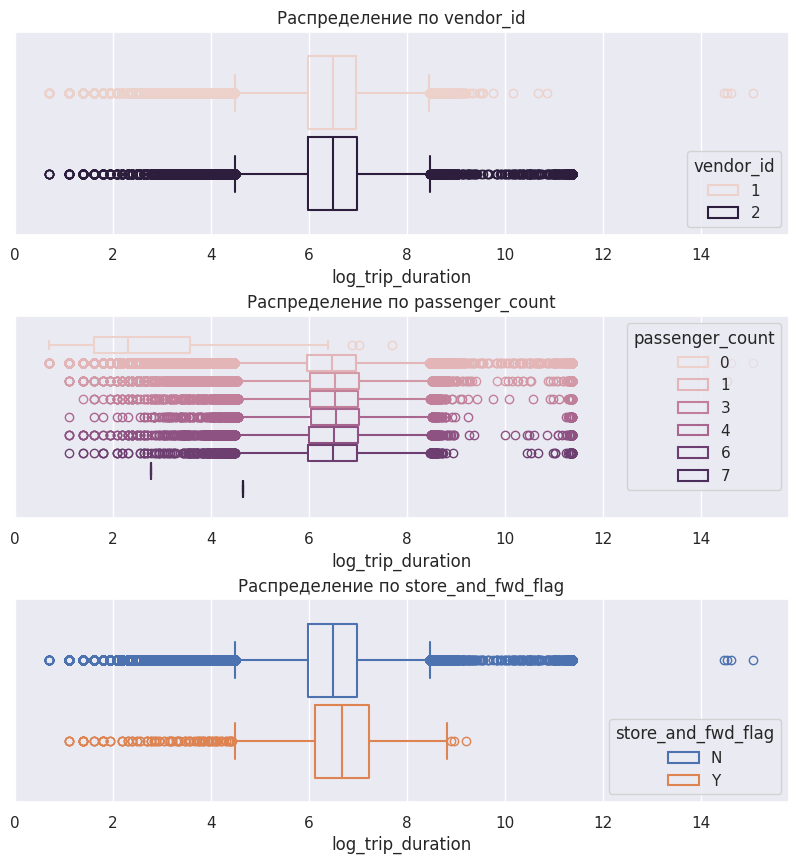

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for row, column in enumerate(transformed_trained_data[['vendor_id', 'passenger_count', 'store_and_fwd_flag']]):
  # print(row, col)
  sns.boxplot(x=transformed_trained_data['log_trip_duration'], hue=transformed_trained_data[column], fill=False, gap=.1, ax=axes[row], log_scale=False)
  axes[row].set_title(f'Распределение по {column}')
  axes[row].set_xlabel('log_trip_duration')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [43]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
transformed_trained_data[['vendor_id','store_and_fwd_flag']] = enc.fit_transform(transformed_trained_data[['vendor_id', 'store_and_fwd_flag']])
transformed_tested_data[['vendor_id','store_and_fwd_flag']] = enc.fit_transform(transformed_tested_data[['vendor_id', 'store_and_fwd_flag']])

In [44]:
y_trained_data = transformed_trained_data['log_trip_duration'].copy()
x_trained_data = transformed_trained_data.drop(columns=['log_trip_duration']).copy()
y_tested_data = transformed_tested_data['log_trip_duration'].copy()
x_tested_data = transformed_tested_data.drop(columns=['log_trip_duration']).copy()


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Скорее всего нет, так как на графиках признаки демонстрируют крайне слабую зависимость логарифма времени поездки от значений.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [45]:
numeric_features = ['haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads']
categorical_features = ['pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia', 'pickup_at_airport_JohnFKennedyInternational',  'dropoff_at_airport_JohnFKennedyInternational',
                        'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational', 'pickup_cell', 'dropoff_cell', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_trained_data, y_trained_data)
y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

Test MSE = 0.2275
Train MSE = 0.2301


In [46]:
print("Size before OneHot:", x_trained_data.shape)
print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)

Size before OneHot: (1021050, 28)
Size after OneHot: (1021050, 158)


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Уходят в мусорку 'vendor_id', 'passenger_count', 'store_and_fwd_flag'

In [47]:
transformed_trained_data = transformed_trained_data.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])
transformed_tested_data = transformed_tested_data.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [48]:
transformed_trained_data['trip_duration'].sort_values(ascending=False)[0:5]

,trip_duration
978383,3526282
924150,2227612
680594,2049578
355003,1939736
1234291,86392


In [49]:
transformed_trained_data['trip_duration'].sort_values()[0:100]

,trip_duration
311745,1
1125014,1
610159,1
269418,1
563953,1
...,...
192263,2
706780,2
1027616,2
665854,2


In [50]:
transformed_trained_data['trip_duration'].sort_values()

,trip_duration
311745,1
1125014,1
610159,1
269418,1
563953,1
...,...
1234291,86392
355003,1939736
680594,2049578
924150,2227612


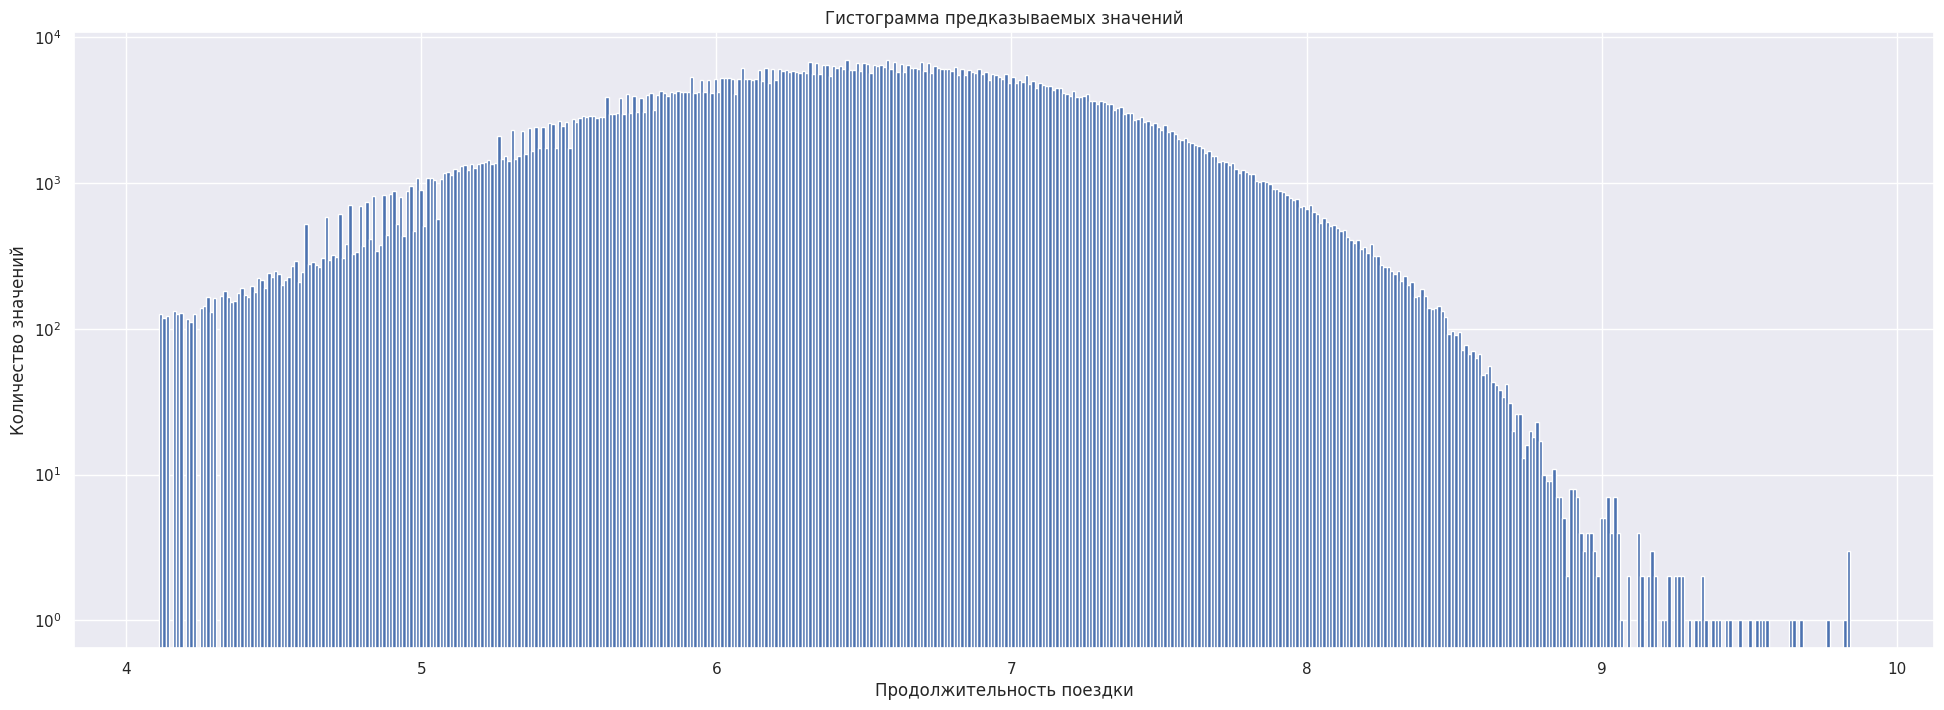

,trip_duration
544572,60
859243,60
735952,60
631712,60
554771,60
...,...
1416336,17363
173931,18439
824127,18719
435302,18723


In [51]:
transformed_trained_data = transformed_trained_data.drop(transformed_trained_data[transformed_trained_data['trip_duration'] > 20000].index) #Убираем поездки более 20000 сек (5,3 часов)
transformed_trained_data = transformed_trained_data.drop(transformed_trained_data[transformed_trained_data['trip_duration'] < 60].index)    #Убираем поездки меннее 60 сек

plt.figure(figsize=(24, 8))
plt.hist(transformed_trained_data['log_trip_duration'] , bins=500, log=True)
plt.title('Гистограмма предказываемых значений')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество значений')
plt.show()

transformed_trained_data['trip_duration'].sort_values()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [52]:
transformed_trained_data.isna().sum().sum()

np.int64(0)

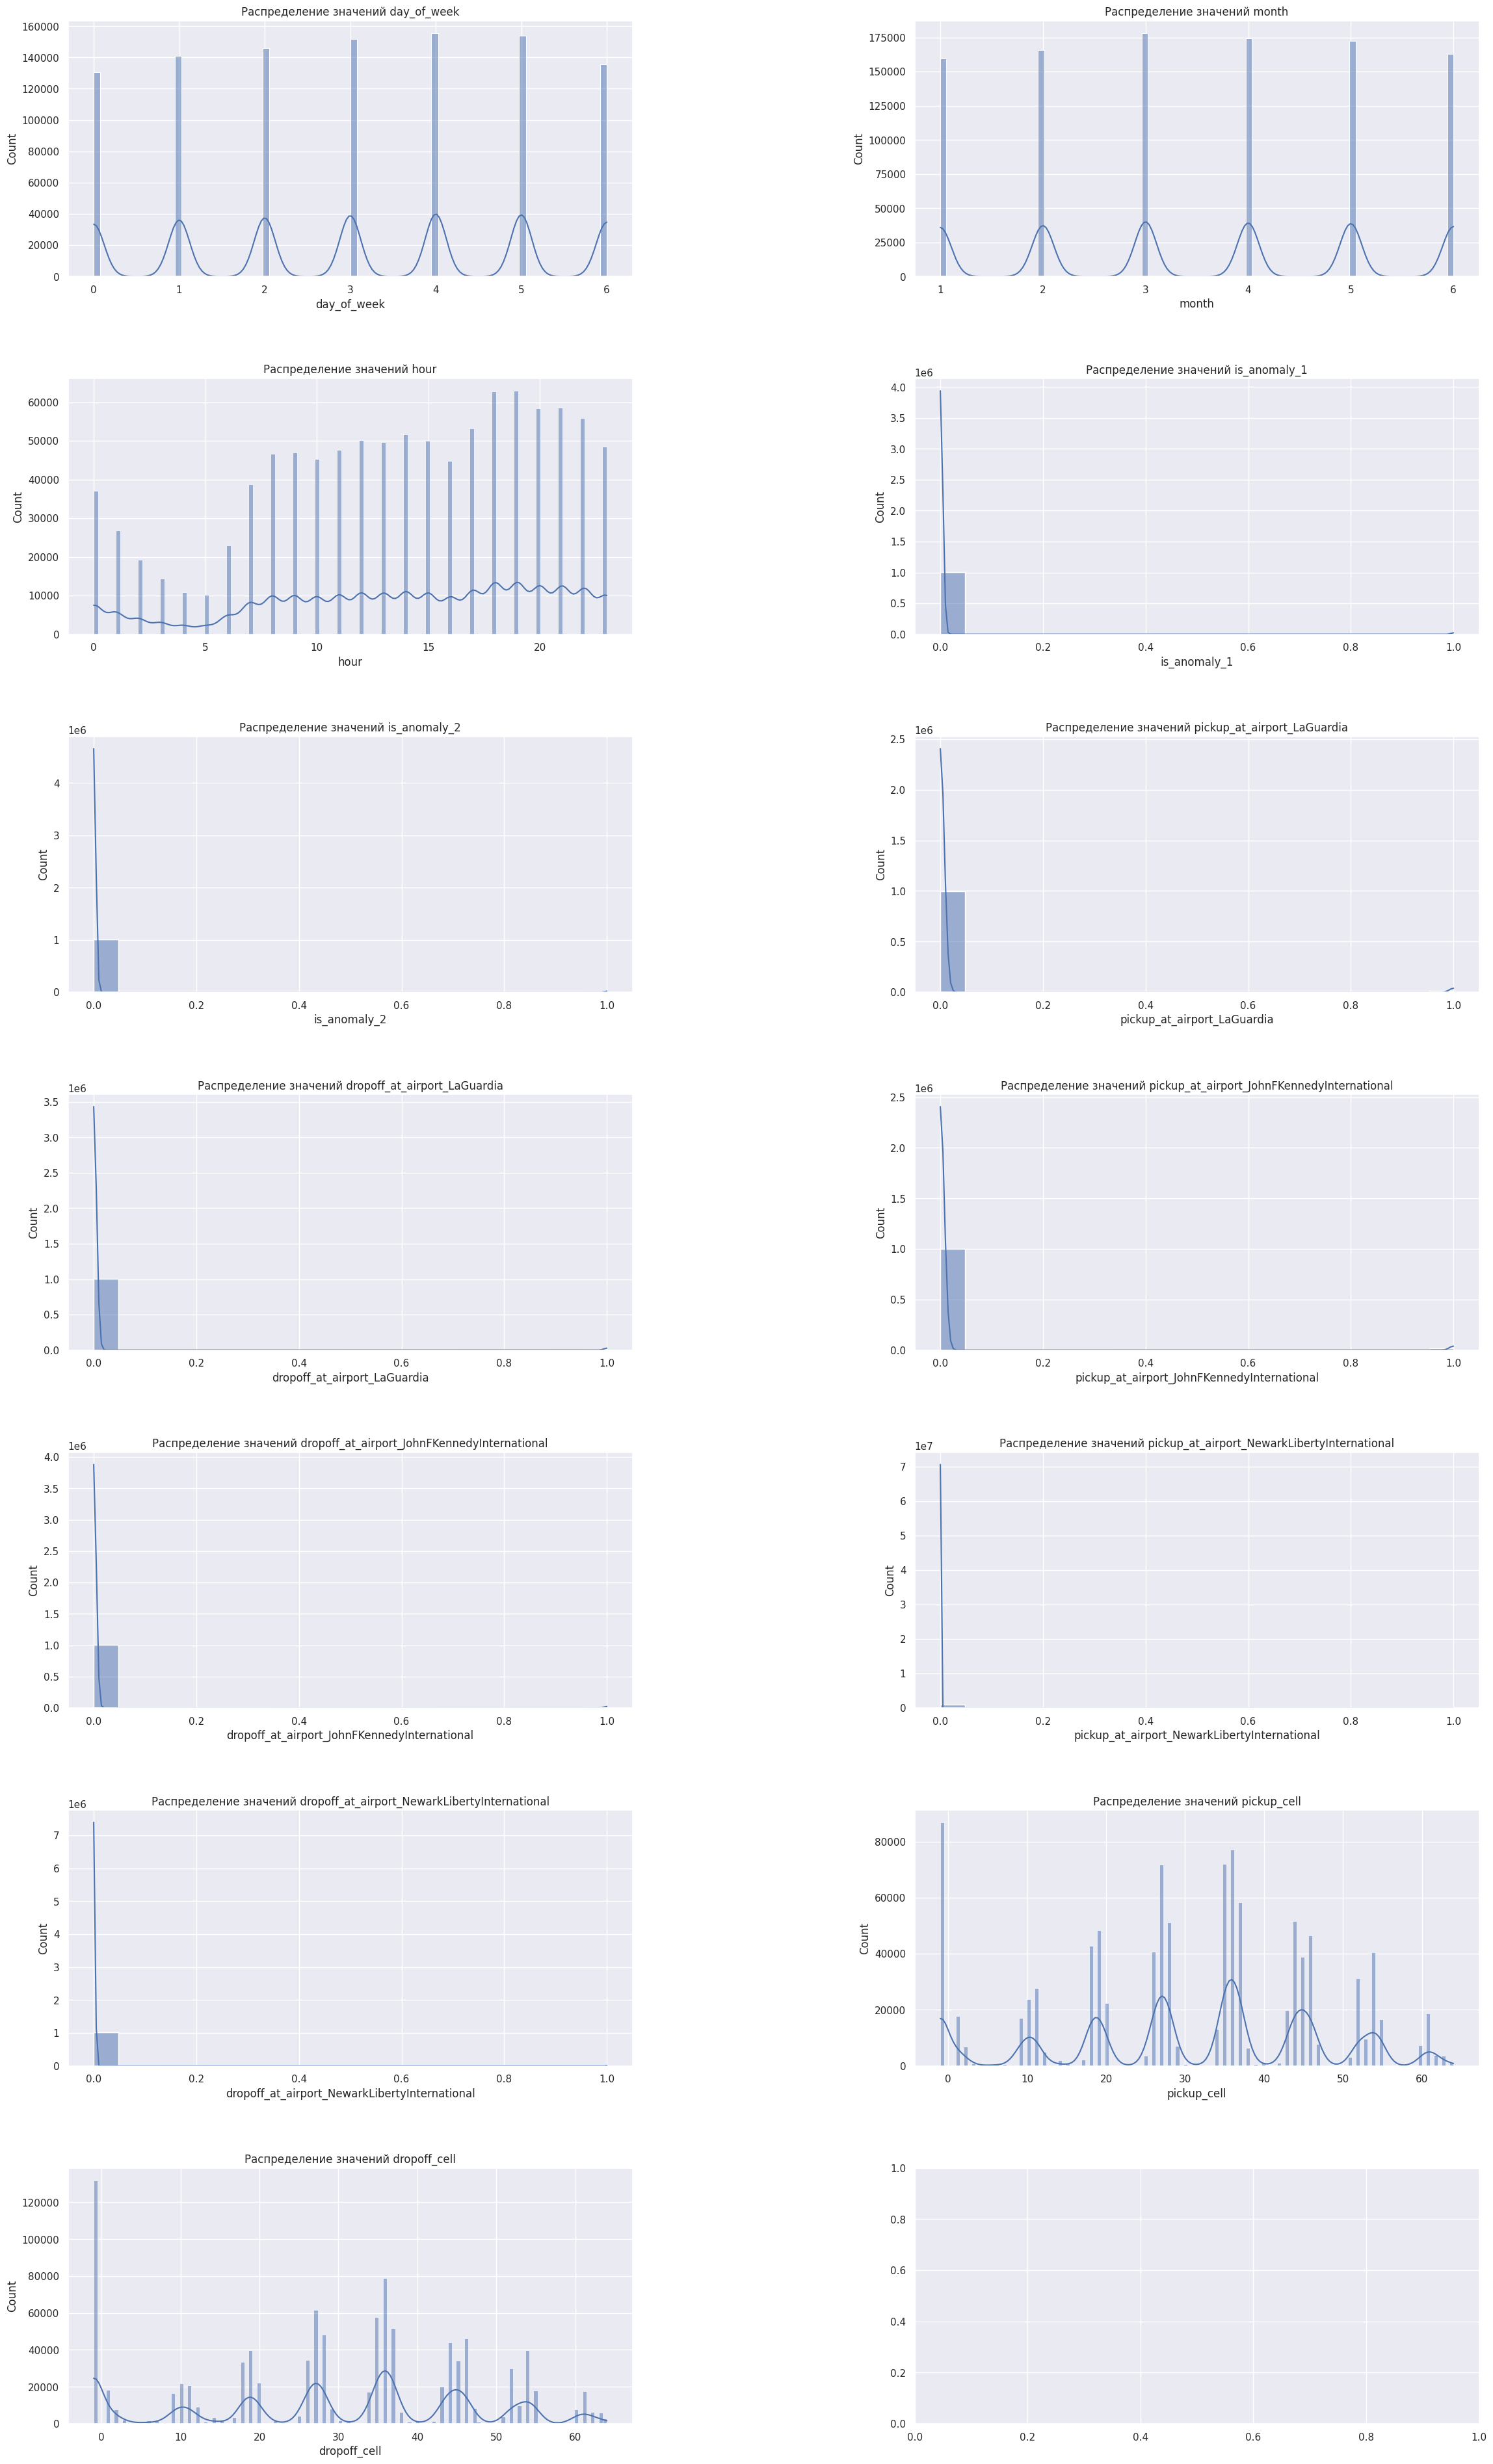

In [53]:
# numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_year']
# categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_1', 'is_anomaly_2']
# numeric_features = ['haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads']
# categorical_features = ['pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia', 'pickup_at_airport_JohnFKennedyInternational',  'dropoff_at_airport_JohnFKennedyInternational',
#                         'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational', 'pickup_cell', 'dropoff_cell', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_1', 'is_anomaly_2', 'pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia', 'pickup_at_airport_JohnFKennedyInternational',
                        'dropoff_at_airport_JohnFKennedyInternational',  'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational', 'pickup_cell', 'dropoff_cell']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(28, 48))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i, column in enumerate(transformed_trained_data[categorical_features].columns):
  row = i // 2
  col = i % 2
  # print(row, col)
  sns.histplot(data=transformed_trained_data, x=transformed_trained_data[column], ax=axes[row, col], kde=True)            #boxplot(x=train_data['log_trip_duration'], hue=train_data[column], fill=False, gap=.1, ax=axes[row, col], log_scale=False)
  axes[row, col].set_title(f'Распределение значений {column}')
  axes[row, col].set_xlabel(f'{column}')
plt.show()

In [54]:
# transformed_trained_data['is_anomaly_1', 'is_anomaly_2', 'pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia', 'pickup_at_airport_JohnFKennedyInternational',
#                         'dropoff_at_airport_JohnFKennedyInternational',  'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational']

transformed_trained_data['is_anomaly_or_airport'] = transformed_trained_data[['is_anomaly_1', 'is_anomaly_2', 'pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia',
                                                                              'pickup_at_airport_JohnFKennedyInternational', 'dropoff_at_airport_JohnFKennedyInternational',
                                                                              'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational']].any(axis=1)

transformed_tested_data['is_anomaly_or_airport'] = transformed_tested_data[['is_anomaly_1', 'is_anomaly_2', 'pickup_at_airport_LaGuardia', 'dropoff_at_airport_LaGuardia',
                                                                              'pickup_at_airport_JohnFKennedyInternational', 'dropoff_at_airport_JohnFKennedyInternational',
                                                                              'pickup_at_airport_NewarkLibertyInternational', 'dropoff_at_airport_NewarkLibertyInternational']].any(axis=1)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [55]:
x_trained_data.shape

(1021050, 28)

In [56]:
y_trained_data = transformed_trained_data['log_trip_duration'].copy()
x_trained_data = transformed_trained_data.drop(columns=['log_trip_duration']).copy()
y_tested_data = transformed_tested_data['log_trip_duration'].copy()
x_tested_data = transformed_tested_data.drop(columns=['log_trip_duration']).copy()

#Скейлинг тут и в предыдущих местах только в пайплайнах

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 'haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads']
categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_or_airport']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

print("Size before OneHot:", x_trained_data.shape)
print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)

Test MSE = 0.2355
Train MSE = 0.1742
Size before OneHot: (1013549, 26)
Size after OneHot: (1013549, 48)


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?


In [57]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

print("Size before OneHot:", x_trained_data.shape)
print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)

Test MSE = 0.6310
Train MSE = 0.5312
Size before OneHot: (1013549, 26)
Size after OneHot: (1013549, 48)


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [58]:
x_train_v, x_val, y_train_v, y_val = train_test_split(x_trained_data, y_trained_data, train_size=0.8, random_state=10)  # Обучающую и валидационную выборки делим в отношении 8:2

(202710, 48) (202710,)
Best alpha = 4281.3324


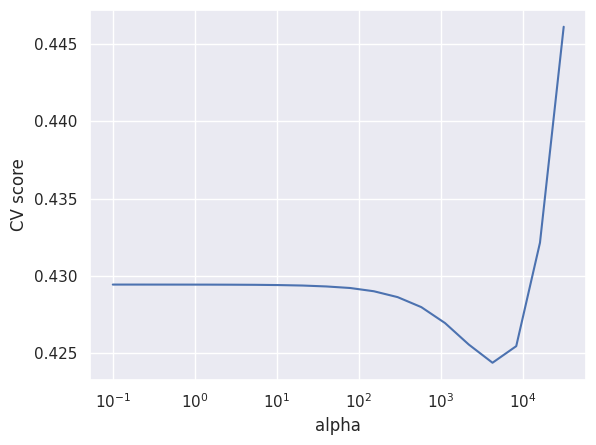

In [59]:
from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train_v[numeric_features])
# x_test_scaled = scaler.transform(x_val[numeric_features])

trans = column_transformer
x_train_scaled = trans.fit_transform(x_val)

alphas = np.logspace(-1, 4.5, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
print(x_train_scaled.shape, y_val.shape)
searcher.fit(x_train_scaled, y_val)

best_alpha_r = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha_r)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

(202710, 26) (202710,)
Best alpha = 0.0007


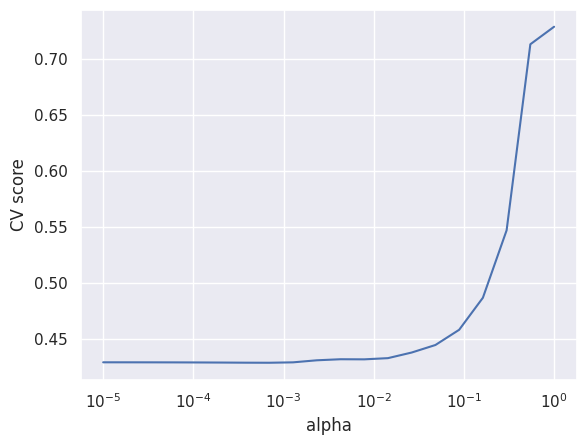

In [60]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5, 0, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
print(x_val.shape, y_val.shape)
searcher.fit(x_val, y_val)

best_alpha_l = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha_l)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
plt.show()

In [61]:
ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha_r))
]) #4281.3324

model = ridge_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Ridge")
print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

# print("Size before OneHot:", x_trained_data.shape)
# print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)


lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_l))
]) #0.0007

model = lasso_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Lasso")
print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_trained_data, y_train_pred))

# print("Size before OneHot:", x_trained_data.shape)
# print("Size after OneHot:", column_transformer.transform(x_trained_data).shape)

Ridge
Test MSE = 0.2363
Train MSE = 0.1745
Lasso
Test MSE = 0.2362
Train MSE = 0.1747


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [62]:
all_coefs = []
for alpha in alphas:
    lasso_pipeline.set_params(regression__alpha=alpha)
    lasso_pipeline.fit(x_trained_data, y_trained_data)
    coefs = lasso_pipeline.named_steps['regression'].coef_
    all_coefs.append(coefs)

[1.00000000e-05 1.83298071e-05 3.35981829e-05 6.15848211e-05
 1.12883789e-04 2.06913808e-04 3.79269019e-04 6.95192796e-04
 1.27427499e-03 2.33572147e-03 4.28133240e-03 7.84759970e-03
 1.43844989e-02 2.63665090e-02 4.83293024e-02 8.85866790e-02
 1.62377674e-01 2.97635144e-01 5.45559478e-01 1.00000000e+00] [-5.         -4.73684211 -4.47368421 -4.21052632 -3.94736842 -3.68421053
 -3.42105263 -3.15789474 -2.89473684 -2.63157895 -2.36842105 -2.10526316
 -1.84210526 -1.57894737 -1.31578947 -1.05263158 -0.78947368 -0.52631579
 -0.26315789  0.        ]


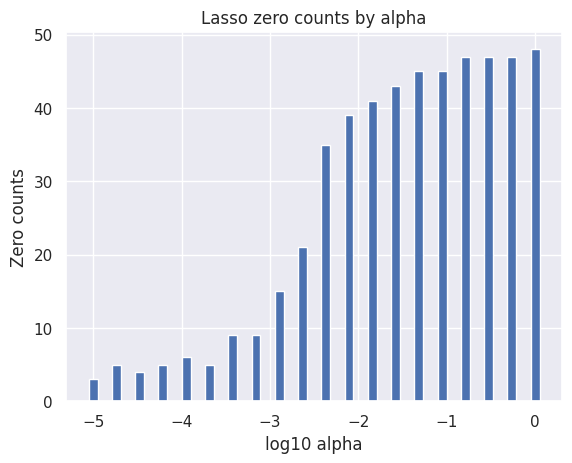

In [63]:
coefs_zeros = []
for ar in all_coefs:
  coefs_zeros.append(len(ar[ar == 0]))

print(alphas, np.log10(alphas))
# print(coefs_zeros)

fig, ax = plt.subplots()
ax.bar(np.log10(alphas), coefs_zeros, width=0.1)
ax.set_ylabel('Zero counts')
ax.set_xlabel('log10 alpha')
ax.set_title('Lasso zero counts by alpha')

plt.show()

In [64]:
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(4.28133240e-03))
]) #4.28133240e-03  35 обнулённых весов

model = lasso_pipeline.fit(x_trained_data[:13], y_trained_data[:13])

y_pred = model.predict(x_tested_data)
y_train_pred = model.predict(x_trained_data)

print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))

# Точность Lasso
# Test MSE = 0.2362

print("Loss =", mean_squared_error(y_tested_data, y_pred) - 0.2362)

Test MSE = 0.6038
Loss = 0.3676230743668555


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Он может помочь найти новые зависимости между маршрутом из одной клетки в другую и временем поездки. Линейная модель рассматривает признаки независимо, поэтому распределяет веса для самих клеток, а не их маршрутами. Именно для этого добавляется конкретный категориальный признак, который задаёт маршрут - пару клеток.

In [65]:
# pair_counts = x_trained_data[(x_trained_data['pickup_cell'] > -1) & (x_trained_data['dropoff_cell'] > -1)].value_counts(['pickup_cell', 'dropoff_cell']).head(100).reset_index()

# pair_counts['pair_id'] = range(len(pair_counts))
# x_trained_data = x_trained_data.merge(pair_counts[['pickup_cell', 'dropoff_cell', 'pair_id']], on=['pickup_cell', 'dropoff_cell'], how='left')

# x_trained_data['frequent_pair'] = x_trained_data['pair_id'].fillna(-1).astype(int)
# x_trained_data = x_trained_data.drop('pair_id', axis=1)

# x_trained_data = x_trained_data.drop('frequent_pair', axis=1)



# pair_counts = x_tested_data[(x_tested_data['pickup_cell'] > -1) & (x_tested_data['dropoff_cell'] > -1)].value_counts(['pickup_cell', 'dropoff_cell']).head(100).reset_index()

# pair_counts['pair_id'] = range(len(pair_counts))
# x_tested_data = x_tested_data.merge(pair_counts[['pickup_cell', 'dropoff_cell', 'pair_id']], on=['pickup_cell', 'dropoff_cell'], how='left')

# x_tested_data['frequent_pair'] = x_tested_data['pair_id'].fillna(-1).astype(int)
# x_tested_data = x_tested_data.drop('pair_id', axis=1)

# x_tested_data = x_tested_data.drop('frequent_pair', axis=1)




pair_counts = transformed_trained_data[(transformed_trained_data['pickup_cell'] > -1) & (transformed_trained_data['dropoff_cell'] > -1)].value_counts(['pickup_cell', 'dropoff_cell']).head(100).reset_index()

pair_counts['pair_id'] = range(len(pair_counts))
transformed_trained_data = transformed_trained_data.merge(pair_counts[['pickup_cell', 'dropoff_cell', 'pair_id']], on=['pickup_cell', 'dropoff_cell'], how='left')

transformed_trained_data['frequent_pair'] = transformed_trained_data['pair_id'].fillna(-1).astype(int)
transformed_trained_data = transformed_trained_data.drop('pair_id', axis=1)

transformed_trained_data



pair_counts = transformed_tested_data[(transformed_tested_data['pickup_cell'] > -1) & (transformed_tested_data['dropoff_cell'] > -1)].value_counts(['pickup_cell', 'dropoff_cell']).head(100).reset_index()

pair_counts['pair_id'] = range(len(pair_counts))
transformed_tested_data = transformed_tested_data.merge(pair_counts[['pickup_cell', 'dropoff_cell', 'pair_id']], on=['pickup_cell', 'dropoff_cell'], how='left')

transformed_tested_data['frequent_pair'] = transformed_tested_data['pair_id'].fillna(-1).astype(int)
transformed_tested_data = transformed_tested_data.drop('pair_id', axis=1)

transformed_tested_data


y_trained_data = transformed_trained_data['log_trip_duration'].copy()
x_trained_data = transformed_trained_data.drop(columns=['log_trip_duration']).copy()
y_tested_data = transformed_tested_data['log_trip_duration'].copy()
x_tested_data = transformed_tested_data.drop(columns=['log_trip_duration']).copy()

# Можно ещё попробовать добавить признаки поездок из одного края города в другой, или извне и на остров

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [66]:
# from sklearn.metrics import root_mean_squared_error

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 'haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads']
categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_or_airport', 'frequent_pair']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)

print("Ridge")
print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))
# print("Test RMSE = %.4f" % root_mean_squared_error(y_tested_data, y_pred))

Ridge
Test MSE = 0.2391


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Оно может более точно определить расстояние между координатами поездки черте города, соответственно, и время.

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [67]:
from numpy.linalg import inv

def manhattan_distance(p_x, q_x, p_y, q_y):
  p = (transition_matrix @ np.array([p_x, p_y]).reshape(2, 1) + new_zero_point).reshape(1, 2)[0]
  q = (transition_matrix @ np.array([q_x, q_y]).reshape(2, 1) + new_zero_point).reshape(1, 2)[0]
  m_d = abs(p[0] - q[0]) + abs(p[1] - q[1])
  return m_d

v1 = np.array([40.76687519601966, -73.97908274110763])
v2 = np.array([40.7650131420502, -73.97669152143764])
zero_point = np.array([40.76619913940744, -73.9795383042568])

transition_matrix = np.linalg.inv([v1, v2])
new_zero_point = -transition_matrix @ zero_point.reshape(2, 1)

for d in [transformed_trained_data, transformed_tested_data]:
  d['manhattan_distance'] = d.apply(lambda x: manhattan_distance(x['pickup_latitude'], x['dropoff_latitude'], x['pickup_longitude'], x['dropoff_longitude']), axis=1)
  d['log_manhattan'] = np.log1p(d['manhattan_distance'])

# transformed_trained_data[['haversine', 'manhattan_distance', 'log_haversine', 'log_manhattan', 'trip_duration', 'log_trip_duration']].corr()

y_trained_data = transformed_trained_data['log_trip_duration'].copy()
x_trained_data = transformed_trained_data.drop(columns=['log_trip_duration']).copy()
y_tested_data = transformed_tested_data['log_trip_duration'].copy()
x_tested_data = transformed_tested_data.drop(columns=['log_trip_duration']).copy()

transformed_trained_data[['haversine', 'manhattan_distance', 'log_haversine', 'log_manhattan', 'trip_duration', 'log_trip_duration']].corr()

# m = folium.Map(location=[40.75975327599296, -73.99169652292254]) # [lat, long]
# folium.PolyLine(
#     locations=[[40.76687519601966, -73.97908274110763],[40.76619913940744, -73.9795383042568],[40.7650131420502, -73.97669152143764]],
#     color="#FF0000",
#     weight=5,
#     tooltip="New coord",
# ).add_to(m)

# m

,haversine,manhattan_distance,log_haversine,log_manhattan,trip_duration,log_trip_duration
haversine,1.000000,0.881510,0.835080,0.590174,0.691590,0.598584
manhattan_distance,0.881510,1.000000,0.653730,0.662866,0.608424,0.474314
log_haversine,0.835080,0.653730,1.000000,0.666001,0.767240,0.777100
log_manhattan,0.590174,0.662866,0.666001,1.000000,0.572766,0.580644
trip_duration,0.691590,0.608424,0.767240,0.572766,1.000000,0.882840
log_trip_duration,0.598584,0.474314,0.777100,0.580644,0.882840,1.000000


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.



In [68]:
numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_year', 'haversine', 'log_haversine', 'trip_during_traffic_jams', 'trip_during_free_roads',
                    'manhattan_distance', 'log_manhattan']
categorical_features = ['day_of_week', 'month', 'hour', 'is_anomaly_or_airport', 'frequent_pair']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = ridge_pipeline.fit(x_trained_data, y_trained_data)

y_pred = model.predict(x_tested_data)

print("Ridge")
print("Test MSE = %.4f" % mean_squared_error(y_tested_data, y_pred))

Ridge
Test MSE = 0.2296


**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [69]:
!pip install h3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00


In [76]:
import h3

lat, lng = 37.769377, -122.388903
resolution = 9
hex = h3.latlng_to_cell(lat, lng, resolution)

m = folium.Map() # [lat, long]
hex.add_to(m)
m

AttributeError: 'str' object has no attribute 'add_to'

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

In [ ]:
end_time = time.time()
total_time = end_time - start_time

print(f"⏱️ Общее время выполнения: {total_time:.2f} секунд")
print(f"📅 Завершено: {datetime.datetime.now().strftime('%H:%M:%S')}")